In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta
import seaborn as sns
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
from random import randrange
import seaborn as sns
list_tables = sorted(os.listdir("Archivos Ecobici"))
from datetime import datetime,timedelta

In [2]:
list_tables

['2017-11.csv',
 '2017-12.csv',
 '2018-01.csv',
 '2018-02.csv',
 '2018-03.csv',
 '2018-04.csv',
 '2018-05.csv',
 '2018-06.csv',
 '2018-07.csv',
 '2018-08.csv',
 '2018-09.csv',
 '2018-10.csv',
 '2018-11.csv',
 '2018-12.csv',
 '2019-01.csv',
 '2019-02.csv',
 '2019-03.csv',
 '2019-04.csv',
 '2019-05.csv',
 '2019-06.csv',
 '2019-07.csv',
 '2019-08.csv',
 '2019-09.csv',
 '2019-10.csv']

In [3]:
df=pd.DataFrame()
for table_in_i in list_tables:
    aux = pd.read_csv(os.path.join('Archivos Ecobici',table_in_i))
    tiempo_inicio =  time.strftime("%H:%M:%S") 
 
    df = pd.concat([df, aux],axis = 0)
    tiempo_fin =  time.strftime("%H:%M:%S")
    print(table_in_i,'Tiempo inicio ->',tiempo_inicio,'Tiempo fin',tiempo_fin)

    #     df = pd.concat([df,pd.read_csv(os.path.join('Archivos Ecobici',table_in_i))],axis = 0)
df = df.drop(columns = 'Unnamed: 9')
print('dimension de la tabla',df.shape)
print('Columnas',df.columns)

E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2017-11.csv Tiempo inicio -> 15:02:21 Tiempo fin 15:02:21
2017-12.csv Tiempo inicio -> 15:02:22 Tiempo fin 15:02:22
2018-01.csv Tiempo inicio -> 15:02:23 Tiempo fin 15:02:23
2018-02.csv Tiempo inicio -> 15:02:24 Tiempo fin 15:02:24
2018-03.csv Tiempo inicio -> 15:02:25 Tiempo fin 15:02:26
2018-04.csv Tiempo inicio -> 15:02:27 Tiempo fin 15:02:27
2018-05.csv Tiempo inicio -> 15:02:28 Tiempo fin 15:02:29
2018-06.csv Tiempo inicio -> 15:02:30 Tiempo fin 15:02:31
2018-07.csv Tiempo inicio -> 15:02:32 Tiempo fin 15:02:33
2018-08.csv Tiempo inicio -> 15:02:34 Tiempo fin 15:02:36
2018-09.csv Tiempo inicio -> 15:02:36 Tiempo fin 15:02:38
2018-10.csv Tiempo inicio -> 15:02:39 Tiempo fin 15:02:41
2018-11.csv Tiempo inicio -> 15:02:42 Tiempo fin 15:02:44
2018-12.csv Tiempo inicio -> 15:02:45 Tiempo fin 15:02:47
2019-01.csv Tiempo inicio -> 15:02:47 Tiempo fin 15:02:50
2019-02.csv Tiempo inicio -> 15:02:51 Tiempo fin 15:02:53


E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


2019-03.csv Tiempo inicio -> 15:02:54 Tiempo fin 15:02:57
2019-04.csv Tiempo inicio -> 15:02:57 Tiempo fin 15:03:01
2019-05.csv Tiempo inicio -> 15:03:01 Tiempo fin 15:03:05
2019-06.csv Tiempo inicio -> 15:03:05 Tiempo fin 15:03:09
2019-07.csv Tiempo inicio -> 15:03:10 Tiempo fin 15:03:13
2019-08.csv Tiempo inicio -> 15:03:14 Tiempo fin 15:03:18
2019-09.csv Tiempo inicio -> 15:03:19 Tiempo fin 15:03:23
2019-10.csv Tiempo inicio -> 15:03:24 Tiempo fin 15:03:28
dimension de la tabla (17104573, 9)
Columnas Index(['Bici', 'Ciclo_Estacion_Arribo', 'Ciclo_Estacion_Retiro',
       'Edad_Usuario', 'Fecha_Arribo', 'Fecha_Retiro', 'Genero_Usuario',
       'Hora_Arribo', 'Hora_Retiro'],
      dtype='object')


# Limpieza de las variables: Bici y Cicloestaciones

In [4]:
bicis_sucias = pd.DataFrame(df['Bici'].unique())
estacion_retiro = pd.DataFrame(df['Ciclo_Estacion_Retiro'].unique())
estacion_arribo = pd.DataFrame(df['Ciclo_Estacion_Arribo'].unique())

In [5]:
bicis_sucias.to_excel('bicis_sucias.xlsx')
estacion_retiro.to_excel('estacion_retiro.xlsx')
estacion_arribo.to_excel('estacion_arribo.xlsx')

In [6]:
ls_erase_bici = ['f2003','lab007','M000X','MXXXX','M00XX','M0XXX','f2002','1500C','C037',
            'C130','C222','C182','1340PRUEBA','f2009','lab003']
ls_erase_estacion = ['32:11.8']

In [7]:
bicis_sucias = df['Bici'].unique()
bicis_limpias_0= []
for bici_i in bicis_sucias:
    if bici_i not in ls_erase_bici:
        bicis_limpias_0.append(bici_i)

bicis_limpias = pd.DataFrame(bicis_limpias_0)
bicis_limpias.reset_index()
bicis_limpias.columns = ['Bici_aux']
bicis_limpias['Bici'] = bicis_limpias['Bici_aux'].astype(int)
bicis_limpias = bicis_limpias.drop(columns = ['Bici_aux'])

bicis_unicas  =  pd.DataFrame({'Bici':bicis_limpias['Bici'].unique()})
bicis_unicas['Bici'].astype(int)

bicis_old, columns = bicis_limpias.shape
bicis_limpias, columns = bicis_unicas.shape
print('Bicis limpias y repetidas ->',bicis_old,'Bicis Limpias y unicas',bicis_limpias)
print(bicis_unicas.dtypes)
bicis_unicas.head(5)

Bicis limpias y repetidas -> 16752 Bicis Limpias y unicas 8435
Bici    int64
dtype: object


,Bici
0,10225
1,8106
2,10899
3,9931
4,8934


In [8]:
# Aquì va la limpieza de las cicloestaciones

In [9]:
estacion_retiro_sucias = df['Ciclo_Estacion_Retiro'].unique()
estacion_retiro_limpias_0 = []
for estacion_i in estacion_retiro_sucias:
    if estacion_i not in ls_erase_estacion:
        estacion_retiro_limpias_0.append(estacion_i)
        
estacion_retiro_limpias = pd.DataFrame(estacion_retiro_limpias_0)
estacion_retiro_limpias.reset_index()
estacion_retiro_limpias.columns = ['Estacion_aux']
estacion_retiro_limpias['Ciclo_Estacion_Retiro'] = estacion_retiro_limpias['Estacion_aux'].astype(int)
estacion_retiro_limpias = estacion_retiro_limpias.drop(columns = ['Estacion_aux'])

estacion_retiro_unicas = pd.DataFrame({'Ciclo_Estacion_Retiro':estacion_retiro_limpias['Ciclo_Estacion_Retiro'].unique()})
estacion_retiro_unicas['Ciclo_Estacion_Retiro'].astype(int)

estaciones_old, columns = estacion_retiro_limpias.shape
estaciones_limpias, columns = estacion_retiro_unicas.shape
print('Estaciones limpias y repetidas ->',estaciones_old,'Estaciones Limpias y unicas',estaciones_limpias)
print(estacion_retiro_unicas.dtypes)
estacion_retiro_unicas.head(5)

Estaciones limpias y repetidas -> 485 Estaciones Limpias y unicas 485
Ciclo_Estacion_Retiro    int64
dtype: object


,Ciclo_Estacion_Retiro
0,169
1,359
2,84
3,137
4,134


In [10]:
estacion_Arribo_sucias = df['Ciclo_Estacion_Arribo'].unique()
estacion_Arribo_limpias_0 = []
for estacion_i in estacion_Arribo_sucias:
    if estacion_i not in ls_erase_estacion:
        estacion_Arribo_limpias_0.append(estacion_i)
        
estacion_Arribo_limpias = pd.DataFrame(estacion_Arribo_limpias_0)
estacion_Arribo_limpias.reset_index()
estacion_Arribo_limpias.columns = ['Estacion_aux']
estacion_Arribo_limpias['Ciclo_Estacion_Arribo'] = estacion_Arribo_limpias['Estacion_aux'].astype(int)
estacion_Arribo_limpias = estacion_Arribo_limpias.drop(columns = ['Estacion_aux'])

estacion_Arribo_unicas = pd.DataFrame({'Ciclo_Estacion_Arribo':estacion_Arribo_limpias['Ciclo_Estacion_Arribo'].unique()})
estacion_Arribo_unicas['Ciclo_Estacion_Arribo'].astype(int)

estaciones_old, columns = estacion_Arribo_limpias.shape
estaciones_limpias, columns = estacion_Arribo_unicas.shape
print('Estaciones limpias y repetidas ->',estaciones_old,'Estaciones Limpias y unicas',estaciones_limpias)
print(estacion_Arribo_unicas.dtypes)
estacion_Arribo_unicas.head(5)

Estaciones limpias y repetidas -> 964 Estaciones Limpias y unicas 485
Ciclo_Estacion_Arribo    int64
dtype: object


,Ciclo_Estacion_Arribo
0,447
1,338
2,150
3,182
4,116


In [11]:
df_aux_ret = estacion_retiro_unicas.reset_index()
df_aux_arri = estacion_Arribo_unicas.reset_index()
print('Columnas retiro',df_aux_ret.columns)
print('Columnas arribo',df_aux_arri.columns )

df_estaciones = df_aux_ret.merge(df_aux_arri , how='outer' ,left_on='Ciclo_Estacion_Retiro', right_on='Ciclo_Estacion_Arribo')
# df_estaciones.rename(columns={'index_x' : 'Conteo_Est_Retiro','index_y':'Conteo_Est_Arribo'}, inplace=True)
df_estaciones = df_estaciones.drop(columns = ['index_x','index_y'])
print(df_estaciones.shape)
df_estaciones.head(5)

Columnas retiro Index(['index', 'Ciclo_Estacion_Retiro'], dtype='object')
Columnas arribo Index(['index', 'Ciclo_Estacion_Arribo'], dtype='object')
(485, 2)


,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo
0,169,169
1,359,359
2,84,84
3,137,137
4,134,134


In [12]:
df_aux_r = estacion_retiro_unicas
df_aux_r = df_aux_r.rename(columns={'Ciclo_Estacion_Retiro' : 'Estacion'})

df_aux_a = estacion_Arribo_unicas
df_aux_a = df_aux_a.rename(columns={'Ciclo_Estacion_Arribo' : 'Estacion'})

Estaciones=pd.DataFrame()
Estaciones = pd.concat([Estaciones, df_aux_r],axis = 0)
Estaciones = pd.concat([Estaciones, df_aux_a],axis = 0)
Estaciones.sort_values(['Estacion'],ascending=True, inplace=True)

estaciones_unicas = pd.DataFrame({'Estaciones_unicas':Estaciones['Estacion'].unique()})
estaciones_unicas.sort_values(['Estaciones_unicas'],ascending=True,inplace=True)
estaciones_unicas.head(5)

,Estaciones_unicas
0,1
1,2
2,3
3,4
4,5


In [13]:
valida_estaciones_arri = estaciones_unicas.merge(estacion_Arribo_unicas,left_on = 'Estaciones_unicas', right_on = 'Ciclo_Estacion_Arribo')
estaciones_arribo, col = valida_estaciones_arri.shape

valida_estaciones_ret = estaciones_unicas.merge(estacion_retiro_unicas,left_on = 'Estaciones_unicas', right_on = 'Ciclo_Estacion_Retiro')
estaciones_retiro, col = valida_estaciones_ret.shape
print('Sin son 485 ambos, significa que tienen las mismas estaciones')
print('Estaciones arribo',estaciones_arribo,'Estaciones Retiro',estaciones_retiro)

Sin son 485 ambos, significa que tienen las mismas estaciones
Estaciones arribo 485 Estaciones Retiro 485


Entonces... Se puede tomar valores aleatorios de éstas 485 estaciones y ver si los cluster son los mismos en arribo y retiro o cuales son las diferencias

In [14]:
estaciones_unicas.head(10)

,Estaciones_unicas
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [15]:
def Proc_freq_sin_aumulados(data,var):
    
    tabla_aux = pd.DataFrame(data)
    
    table_freq = pd.value_counts(tabla_aux[var]).to_frame().reset_index()
    table_freq.columns = [var,'Frequency']

    table_porc = pd.value_counts(tabla_aux[var],normalize = True).to_frame().reset_index()
    table_porc.columns = [var,'aux']
    
    table_porc['Percent'] = table_porc['aux'] *100
    
    table_porc['Percent'].round(3) 
    table_porc = table_porc.drop(columns = 'aux')
    
    table_salida = pd.merge(table_freq, table_porc, on=var)
       
    return table_salida

### Ya tengo los valores unicos y limpios. Sigue limpiar la base y quedarme con estos valores. 

#### Limpieza Estación Arribo 

In [16]:
ls_erase_estacion = ['32:11.8']

df['Ciclo_Estacion_Arribo_aux'] = df.Ciclo_Estacion_Arribo.astype(str)
df['Flag_aux'] = df['Ciclo_Estacion_Arribo_aux'].str.contains(*ls_erase_estacion)

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,99.999994
1,True,1,0.000006


In [17]:
df = df[df['Flag_aux'] == False]

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,100.0


In [18]:
df['Ciclo_Estacion_Arribo'] = df['Ciclo_Estacion_Arribo'].astype(int)
df = df.drop(columns={'Ciclo_Estacion_Arribo_aux','Flag_aux'})

#### Limpieza Estación Retiro 

In [19]:
ls_erase_estacion = ['32:11.8']

df['Ciclo_Estacion_Retiro_aux'] = df.Ciclo_Estacion_Retiro.astype(str)
df['Flag_aux'] = df['Ciclo_Estacion_Retiro_aux'].str.contains(*ls_erase_estacion)

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,100.0


In [20]:
df = df[df['Flag_aux'] == False]

eliminar =  Proc_freq_sin_aumulados(df,'Flag_aux')
eliminar

,Flag_aux,Frequency,Percent
0,False,17104572,100.0


In [21]:
df['Ciclo_Estacion_Retiro'] = df['Ciclo_Estacion_Retiro'].astype(int)
df = df.drop(columns={'Ciclo_Estacion_Retiro_aux','Flag_aux'})

#### Limpieza Bicis 

In [22]:
df['Bici_aux'] = df.Bici.astype(str)

print(df.dtypes)
df.head(5)

Bici                     object
Ciclo_Estacion_Arribo     int32
Ciclo_Estacion_Retiro     int32
Edad_Usuario              int64
Fecha_Arribo             object
Fecha_Retiro             object
Genero_Usuario           object
Hora_Arribo              object
Hora_Retiro              object
Bici_aux                 object
dtype: object


,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Arribo,Hora_Retiro,Bici_aux
0,10225,447,169,44,01/11/2017,01/11/2017,M,0:11:47,0:00:09,10225
1,8106,338,359,35,01/11/2017,01/11/2017,M,0:05:54,0:02:16,8106
2,10899,150,84,27,01/11/2017,01/11/2017,M,0:06:30,0:02:54,10899
3,9931,182,137,27,01/11/2017,01/11/2017,M,0:19:02,0:03:12,9931
4,8934,116,134,23,01/11/2017,01/11/2017,M,0:10:24,0:03:54,8934


In [23]:
ls_erase_bici = ['f2003','lab007','M000X','MXXXX','M00XX','f2002','1500C',
                 'C037' ,'C130' ,'C222','1340PRUEBA','f2009','lab003','M0XXX','C182','f2003']
df['Filtro'] = 0

In [24]:
for ls_erase_bici_i in ls_erase_bici:
    ls_erase_bici_0 = [ls_erase_bici_i]
    Nom_var_aux = 'Aux_' + ls_erase_bici_i
    print('Para la syntaxis ->',ls_erase_bici_0,'Valor raro ->',ls_erase_bici_i,'Auxiliar en tabla',Nom_var_aux)
    
    df[Nom_var_aux] = df['Bici_aux'].str.contains(*ls_erase_bici_0).astype(int)
    df['Filtro'] = df['Filtro'] + df[Nom_var_aux]
    df = df.drop(columns={Nom_var_aux})
    
    Dist_Filtro =  Proc_freq_sin_aumulados(df,'Filtro')
    print(Dist_Filtro)

Para la syntaxis -> ['f2003'] Valor raro -> f2003 Auxiliar en tabla Aux_f2003
   Filtro  Frequency    Percent
0       0   17104553  99.999889
1       1         19   0.000111
Para la syntaxis -> ['lab007'] Valor raro -> lab007 Auxiliar en tabla Aux_lab007
   Filtro  Frequency    Percent
0       0   17104549  99.999866
1       1         23   0.000134
Para la syntaxis -> ['M000X'] Valor raro -> M000X Auxiliar en tabla Aux_M000X
   Filtro  Frequency   Percent
0       0   17104442  99.99924
1       1        130   0.00076
Para la syntaxis -> ['MXXXX'] Valor raro -> MXXXX Auxiliar en tabla Aux_MXXXX
   Filtro  Frequency    Percent
0       0   17104439  99.999222
1       1        133   0.000778
Para la syntaxis -> ['M00XX'] Valor raro -> M00XX Auxiliar en tabla Aux_M00XX
   Filtro  Frequency    Percent
0       0   17104437  99.999211
1       1        135   0.000789
Para la syntaxis -> ['f2002'] Valor raro -> f2002 Auxiliar en tabla Aux_f2002
   Filtro  Frequency    Percent
0       0   17104427

In [25]:
df.head(5)

,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Arribo,Hora_Retiro,Bici_aux,Filtro
0,10225,447,169,44,01/11/2017,01/11/2017,M,0:11:47,0:00:09,10225,0
1,8106,338,359,35,01/11/2017,01/11/2017,M,0:05:54,0:02:16,8106,0
2,10899,150,84,27,01/11/2017,01/11/2017,M,0:06:30,0:02:54,10899,0
3,9931,182,137,27,01/11/2017,01/11/2017,M,0:19:02,0:03:12,9931,0
4,8934,116,134,23,01/11/2017,01/11/2017,M,0:10:24,0:03:54,8934,0


In [26]:
df = df[df['Filtro'] == 0]
df['Bici'] = df['Bici'].astype(int)

In [27]:
df.shape

(17103664, 11)

In [28]:
df.dtypes

Bici                      int32
Ciclo_Estacion_Arribo     int32
Ciclo_Estacion_Retiro     int32
Edad_Usuario              int64
Fecha_Arribo             object
Fecha_Retiro             object
Genero_Usuario           object
Hora_Arribo              object
Hora_Retiro              object
Bici_aux                 object
Filtro                    int64
dtype: object

# Analisis Nivel Estación

In [29]:
ls_random = []
renglones_filt,col = estaciones_unicas.shape
for x  in range (renglones_filt):
    ls_random.append(random.randrange(0,10000)/10000)

estaciones_unicas['Random_Digit'] = ls_random
estaciones_unicas['Random_Digit'].describe(percentiles = [x/10 for x in range(10)]+[0.01, 0.05, 0.95, 0.99])

count    485.000000
mean       0.495473
std        0.299183
min        0.001200
0%         0.001200
1%         0.006168
5%         0.036380
10%        0.077980
20%        0.168340
30%        0.264480
40%        0.402540
50%        0.505400
60%        0.618080
70%        0.705500
80%        0.812720
90%        0.899260
95%        0.933180
99%        0.979384
max        0.994300
Name: Random_Digit, dtype: float64

In [30]:
estaciones_unicas.head(10)

,Estaciones_unicas,Random_Digit
0,1,0.6185
1,2,0.5727
2,3,0.6698
3,4,0.6160
4,5,0.7575
5,6,0.8936
6,7,0.3097
7,8,0.4771
8,9,0.4807
9,10,0.8159


In [31]:
tamanio_muestra = 10/100
# 10 %

In [32]:
muestra_0 = estaciones_unicas[(estaciones_unicas["Random_Digit"] <= tamanio_muestra)]
print(muestra_0.shape)
muestra_0

(61, 2)


,Estaciones_unicas,Random_Digit
11,12,0.0784
23,24,0.0383
28,29,0.0670
35,36,0.0837
37,38,0.0878
40,41,0.0880
49,50,0.0205
51,52,0.0500
54,55,0.0850
61,62,0.0460


In [33]:
muestra_0 = muestra_0.drop(columns = "Random_Digit").reset_index()
muestra_0 = muestra_0.drop(columns = "index")
renglones_muestra_0, col = muestra_0.shape
print('El numero de renglones y columnas es',renglones_muestra_0)
muestra_0

El numero de renglones y columnas es 61


,Estaciones_unicas
0,12
1,24
2,29
3,36
4,38
5,41
6,50
7,52
8,55
9,62


## Se le pega la colonia y la Alcadía a la muestra 

In [34]:
Estaciones_Informacion_Demografica = pd.read_excel('Estaciones_Informacion_Demografica_delegaciones.xlsx')
print(Proc_freq_sin_aumulados(Estaciones_Informacion_Demografica,'Alcaldia'))
estaciones , algo =Estaciones_Informacion_Demografica.shape 
print('Hay ',estaciones,' con información demografica')
Estaciones_Informacion_Demografica.head(5)

         Alcaldia  Frequency    Percent
0  Miguel Hidalgo        173  36.116910
1      Cuauhtémoc        167  34.864301
2   Benito Juarez        139  29.018789
Hay  479  con información demografica


,Cicloestacion,Colonia,Alcaldia
0,1,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc
1,2,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc
2,3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
3,4,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc
4,5,Cuauhtémoc - Cuauhtémoc,Cuauhtémoc


In [35]:
muestra = pd.merge(muestra_0,Estaciones_Informacion_Demografica, how = 'inner',left_on='Estaciones_unicas', right_on='Cicloestacion')
muestra = muestra.drop(columns={'Cicloestacion'})
muestra

,Estaciones_unicas,Colonia,Alcaldia
0,12,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
1,24,Cuauhtémoc - Juárez,Cuauhtémoc
2,29,Cuauhtémoc - Centro,Cuauhtémoc
3,36,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
4,38,Cuauhtémoc - Roma Norte,Cuauhtémoc
5,41,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
6,50,Cuauhtémoc - Condesa,Cuauhtémoc
7,52,Cuauhtémoc - Centro,Cuauhtémoc
8,55,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo
9,62,Cuauhtémoc - Condesa,Cuauhtémoc


In [36]:
Estaciones_alcaldia =  Proc_freq_sin_aumulados(muestra,'Alcaldia')
Estaciones_alcaldia

,Alcaldia,Frequency,Percent
0,Miguel Hidalgo,25,41.666667
1,Cuauhtémoc,21,35.000000
2,Benito Juarez,14,23.333333


In [37]:
muestra_arribo = pd.merge(muestra, df , how='inner' ,left_on='Estaciones_unicas', right_on='Ciclo_Estacion_Arribo')
muestra_arribo = muestra_arribo.drop(columns={'Estaciones_unicas','Filtro'})
print(muestra_arribo.shape)

muestra_arribo.head(5)

(2420349, 12)


,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Arribo,Hora_Retiro,Bici_aux
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,01/11/2017,01/11/2017,F,6:03:20,5:54:18,8583
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,01/11/2017,01/11/2017,M,6:12:03,6:03:54,10453
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,01/11/2017,01/11/2017,M,7:15:05,7:08:31,9245
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8352,12,174,55,01/11/2017,01/11/2017,M,7:36:43,7:30:34,8352
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,01/11/2017,01/11/2017,M,7:40:47,7:38:31,8581


In [38]:
muestra_retiro = pd.merge(muestra, df , how='inner' ,left_on='Estaciones_unicas', right_on='Ciclo_Estacion_Retiro')
muestra_retiro = muestra_retiro.drop(columns={'Estaciones_unicas','Filtro'})
muestra_retiro.shape

(2428666, 12)

# Reglas de Negocio

##  Regla 1.
##  Los usuarios deben recojer y entregar la bici, generalmente, el mismo día

### Muestra Arribo 

In [39]:
muestra_arribo = muestra_arribo[muestra_arribo['Fecha_Arribo'] != '10']
muestra_arribo['Fecha_Arribo'] = pd.to_datetime(muestra_arribo['Fecha_Arribo'], format="%d/%m/%Y")

muestra_arribo['Fecha_Retiro'] = pd.to_datetime(muestra_arribo['Fecha_Retiro'], format="%d/%m/%Y")

muestra_arribo["dias_dif"] = muestra_arribo["Fecha_Retiro"] -muestra_arribo['Fecha_Arribo']
muestra_arribo["dias_dif"] = muestra_arribo[["dias_dif"]]/np.timedelta64(1,'D')

dias = Proc_freq_sin_aumulados(muestra_arribo,'dias_dif')
dias.sort_values(['Frequency'],ascending=True, inplace=True)
dias

,dias_dif,Frequency,Percent
12,-10.0,1,0.000041
22,-114.0,1,0.000041
21,-104.0,1,0.000041
20,-62.0,1,0.000041
19,-57.0,1,0.000041
18,-53.0,1,0.000041
17,-38.0,1,0.000041
16,-36.0,1,0.000041
15,-174.0,1,0.000041
14,-147.0,1,0.000041


Validado, más del 99% tienen como fecha de arribo y de entrega el mismo día. Me quedo con ésta población con dias_dif = 0.

In [40]:
abajo = 0
arriba = 0
variable_quitar = 'dias_dif'
renglones_ini, columns = muestra_arribo.shape
muestra_arribo = muestra_arribo[(abajo <= muestra_arribo[variable_quitar]) & (muestra_arribo[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_arribo.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 2420349 renglones y finalizamos con  2413634


### Muestra Retiro

In [41]:
muestra_retiro = muestra_retiro[muestra_retiro['Fecha_Arribo'] != '10']
muestra_retiro['Fecha_Arribo'] = pd.to_datetime(muestra_retiro['Fecha_Arribo'], format="%d/%m/%Y")

muestra_retiro['Fecha_Retiro'] = pd.to_datetime(muestra_retiro['Fecha_Retiro'], format="%d/%m/%Y")

muestra_retiro["dias_dif"] = muestra_retiro["Fecha_Retiro"] -muestra_retiro['Fecha_Arribo']
muestra_retiro["dias_dif"] = muestra_retiro[["dias_dif"]]/np.timedelta64(1,'D')

dias = Proc_freq_sin_aumulados(muestra_retiro,'dias_dif')
dias.sort_values(['Frequency'],ascending=True, inplace=True)
dias

,dias_dif,Frequency,Percent
12,-9.0,1,0.000041
23,-114.0,1,0.000041
22,-98.0,1,0.000041
21,-74.0,1,0.000041
20,-71.0,1,0.000041
19,-47.0,1,0.000041
18,-36.0,1,0.000041
17,-35.0,1,0.000041
16,-33.0,1,0.000041
15,-31.0,1,0.000041


Validado, más del 99% tienen como fecha de arribo y de entrega el mismo día. Me quedo con ésta población con dias_dif = 0.

In [42]:
abajo = 0
arriba = 0
variable_quitar = 'dias_dif'
renglones_ini, columns = muestra_retiro.shape
muestra_retiro = muestra_retiro[(abajo <= muestra_retiro[variable_quitar]) & (muestra_retiro[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_retiro.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 2428666 renglones y finalizamos con  2422464


# Regla 2.

## Se pueden utilizar hasta 45 minutos por viaje 

### Muestra Arribo 

In [43]:
muestra_arribo = muestra_arribo[muestra_arribo['Hora_Retiro'] != '18::']
muestra_arribo['Hora_Retiro'] = muestra_arribo['Hora_Retiro'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_arribo['hr_ret'] = muestra_arribo["Hora_Retiro"].dt.hour
muestra_arribo['Min_ret'] = muestra_arribo["Hora_Retiro"].dt.minute

muestra_arribo.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
muestra_arribo['Hora_Entrega'] = muestra_arribo['Hora_Entrega'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_arribo['Hr_entrega'] = muestra_arribo["Hora_Entrega"].dt.hour
muestra_arribo['Min_entrega'] = muestra_arribo["Hora_Entrega"].dt.minute

muestra_arribo["Minutos_de_uso"] = (muestra_arribo['Hr_entrega']  - muestra_arribo['hr_ret']) * 60    +  (muestra_arribo['Min_entrega'] - muestra_arribo['Min_ret'])

minutos_uso = Proc_freq_sin_aumulados(muestra_arribo,'Minutos_de_uso')
minutos_uso.sort_values(['Minutos_de_uso'],ascending=False, inplace=True)
minutos_uso

,Minutos_de_uso,Frequency,Percent
753,1238,1,0.000041
648,1193,1,0.000041
646,1107,1,0.000041
645,1023,1,0.000041
644,984,1,0.000041
643,978,1,0.000041
642,975,1,0.000041
641,959,1,0.000041
640,949,1,0.000041
639,947,1,0.000041


In [44]:
def Normaliza_min_uso(data):
    if data['Minutos_de_uso'] < 0:
        val = -1
    elif data['Minutos_de_uso'] <= 5:
        val = 5
    elif data['Minutos_de_uso'] <= 10:
        val = 10
    elif data['Minutos_de_uso'] <= 15:
        val = 15
    elif data['Minutos_de_uso'] <= 20:
        val = 20
    elif data['Minutos_de_uso'] <= 25:
        val = 25
    elif data['Minutos_de_uso'] <= 30:
        val = 30
    elif data['Minutos_de_uso'] <= 45:
        val = 45
    elif data['Minutos_de_uso'] <= 90:
        val = 90
    elif data['Minutos_de_uso'] < 136:
        val = 135
    else:
        val = 136
    return val

In [45]:
muestra_arribo['Normaliza_Uso'] = muestra_arribo.apply(Normaliza_min_uso, axis=1)
minutos_uso_ = Proc_freq_sin_aumulados(muestra_arribo,'Normaliza_Uso')
minutos_uso_.sort_values(['Normaliza_Uso'],ascending=True, inplace=True)
minutos_uso_

,Normaliza_Uso,Frequency,Percent
2,5,404068,16.741063
0,10,734962,30.450433
1,15,510412,21.147034
3,20,307232,12.729022
4,25,186327,7.719770
6,30,115360,4.779515
5,45,123834,5.130604
7,90,24259,1.005082
9,135,2839,0.117623
8,136,4341,0.179853


In [46]:
tamanio, dimension =   muestra_arribo.shape
abajo = 5
arriba = 45
acumulado_uso = minutos_uso_[(abajo <= minutos_uso_['Normaliza_Uso']) & (minutos_uso_['Normaliza_Uso']<= arriba)]
print(sum(acumulado_uso['Percent']),'% corresponde a ',sum(acumulado_uso['Frequency']),'registros . Tamaño original',tamanio)
acumulado_uso

98.69744128562988 % corresponde a  2382195 registros . Tamaño original 2413634


,Normaliza_Uso,Frequency,Percent
2,5,404068,16.741063
0,10,734962,30.450433
1,15,510412,21.147034
3,20,307232,12.729022
4,25,186327,7.719770
6,30,115360,4.779515
5,45,123834,5.130604


Más del 98% de la población cumple con la regla de hasta 45 minutos de uso. Me quedo con ésta población.

In [47]:
abajo = 5
arriba = 45
variable_quitar = 'Normaliza_Uso'
renglones_ini, columns = muestra_arribo.shape
muestra_arribo = muestra_arribo[(abajo <= muestra_arribo[variable_quitar]) & (muestra_arribo[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_arribo.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 2413634 renglones y finalizamos con  2382195


In [48]:
muestra_arribo.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,hr_ret,Min_ret,Hr_entrega,Min_entrega,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,1900-01-01 06:03:20,1900-01-01 05:54:18,8583,0.0,5,54,6,3,9,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,1900-01-01 06:12:03,1900-01-01 06:03:54,10453,0.0,6,3,6,12,9,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,1900-01-01 07:15:05,1900-01-01 07:08:31,9245,0.0,7,8,7,15,7,10
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8352,12,174,55,2017-11-01,2017-11-01,M,1900-01-01 07:36:43,1900-01-01 07:30:34,8352,0.0,7,30,7,36,6,10
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,1900-01-01 07:40:47,1900-01-01 07:38:31,8581,0.0,7,38,7,40,2,5


In [49]:
lst_erase = ['hr_ret','Min_ret','Hr_entrega','Min_entrega']
muestra_arribo = muestra_arribo.drop(columns = lst_erase)

In [50]:
muestra_arribo.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,1900-01-01 06:03:20,1900-01-01 05:54:18,8583,0.0,9,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,1900-01-01 06:12:03,1900-01-01 06:03:54,10453,0.0,9,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,1900-01-01 07:15:05,1900-01-01 07:08:31,9245,0.0,7,10
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8352,12,174,55,2017-11-01,2017-11-01,M,1900-01-01 07:36:43,1900-01-01 07:30:34,8352,0.0,6,10
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,1900-01-01 07:40:47,1900-01-01 07:38:31,8581,0.0,2,5


### Muestra Retiro 

In [51]:
muestra_retiro = muestra_retiro[muestra_retiro['Hora_Retiro'] != '18::']
muestra_retiro['Hora_Retiro'] = muestra_retiro['Hora_Retiro'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_retiro['hr_ret'] = muestra_retiro["Hora_Retiro"].dt.hour
muestra_retiro['Min_ret'] = muestra_retiro["Hora_Retiro"].dt.minute

muestra_retiro.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
muestra_retiro['Hora_Entrega'] = muestra_retiro['Hora_Entrega'].map(lambda x: datetime.strptime(x,"%H:%M:%S"))
muestra_retiro['Hr_entrega'] = muestra_retiro["Hora_Entrega"].dt.hour
muestra_retiro['Min_entrega'] = muestra_retiro["Hora_Entrega"].dt.minute

muestra_retiro["Minutos_de_uso"] = (muestra_retiro['Hr_entrega']  - muestra_retiro['hr_ret']) * 60    +  (muestra_retiro['Min_entrega'] - muestra_retiro['Min_ret'])

minutos_uso = Proc_freq_sin_aumulados(muestra_retiro,'Minutos_de_uso')
minutos_uso.sort_values(['Minutos_de_uso'],ascending=False, inplace=True)
minutos_uso

,Minutos_de_uso,Frequency,Percent
752,1423,1,0.000041
639,1199,1,0.000041
648,1040,1,0.000041
647,978,1,0.000041
646,954,1,0.000041
645,949,1,0.000041
644,944,1,0.000041
643,929,1,0.000041
642,917,1,0.000041
641,907,1,0.000041


In [52]:
muestra_retiro['Normaliza_Uso'] = muestra_retiro.apply(Normaliza_min_uso, axis=1)
minutos_uso_ = Proc_freq_sin_aumulados(muestra_retiro,'Normaliza_Uso')
minutos_uso_.sort_values(['Normaliza_Uso'],ascending=True, inplace=True)
minutos_uso_

,Normaliza_Uso,Frequency,Percent
2,5,395190,16.313555
0,10,741545,30.611188
1,15,526209,21.722057
3,20,312188,12.887209
4,25,181654,7.498729
6,30,113966,4.704549
5,45,120454,4.972375
7,90,23329,0.963028
9,135,2881,0.118928
8,136,5048,0.208383


In [53]:
tamanio, dimension =   muestra_retiro.shape
abajo = 5
arriba = 45
acumulado_uso = minutos_uso_[(abajo <= minutos_uso_['Normaliza_Uso']) & (minutos_uso_['Normaliza_Uso']<= arriba)]
print(sum(acumulado_uso['Percent']),'% corresponde a ',sum(acumulado_uso['Frequency']),'registros . Tamaño original',tamanio)
acumulado_uso

98.70966090724154 % corresponde a  2391206 registros . Tamaño original 2422464


,Normaliza_Uso,Frequency,Percent
2,5,395190,16.313555
0,10,741545,30.611188
1,15,526209,21.722057
3,20,312188,12.887209
4,25,181654,7.498729
6,30,113966,4.704549
5,45,120454,4.972375


Más del 98% de la población cumple con la regla de hasta 45 minutos de uso. Me quedo con ésta población.

In [54]:
abajo = 5
arriba = 45
variable_quitar = 'Normaliza_Uso'
renglones_ini, columns = muestra_retiro.shape
muestra_retiro = muestra_retiro[(abajo <= muestra_retiro[variable_quitar]) & (muestra_retiro[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_retiro.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 2422464 renglones y finalizamos con  2391206


In [55]:
muestra_retiro.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,hr_ret,Min_ret,Hr_entrega,Min_entrega,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8720,174,12,55,2017-11-01,2017-11-01,M,1900-01-01 06:07:32,1900-01-01 06:01:19,8720,0.0,6,1,6,7,6,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2443,25,12,36,2017-11-01,2017-11-01,M,1900-01-01 06:12:20,1900-01-01 06:07:44,2443,0.0,6,7,6,12,5,5
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10181,6,12,42,2017-11-01,2017-11-01,M,1900-01-01 06:51:10,1900-01-01 06:45:03,10181,0.0,6,45,6,51,6,10
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2641,134,12,37,2017-11-01,2017-11-01,F,1900-01-01 07:41:52,1900-01-01 07:31:23,2641,0.0,7,31,7,41,10,10
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,1900-01-01 07:40:47,1900-01-01 07:38:31,8581,0.0,7,38,7,40,2,5


In [56]:
muestra_retiro = muestra_retiro.drop(columns = lst_erase)

In [57]:
muestra_retiro.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8720,174,12,55,2017-11-01,2017-11-01,M,1900-01-01 06:07:32,1900-01-01 06:01:19,8720,0.0,6,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2443,25,12,36,2017-11-01,2017-11-01,M,1900-01-01 06:12:20,1900-01-01 06:07:44,2443,0.0,5,5
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10181,6,12,42,2017-11-01,2017-11-01,M,1900-01-01 06:51:10,1900-01-01 06:45:03,10181,0.0,6,10
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2641,134,12,37,2017-11-01,2017-11-01,F,1900-01-01 07:41:52,1900-01-01 07:31:23,2641,0.0,10,10
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,1900-01-01 07:40:47,1900-01-01 07:38:31,8581,0.0,2,5


## Regla 3.
## Validación que la variable genero sea binaria 

### Muestra Arribo 

In [58]:
genero = Proc_freq_sin_aumulados(muestra_arribo,'Genero_Usuario')
genero.sort_values(['Genero_Usuario'],ascending=True, inplace=True)
genero

,Genero_Usuario,Frequency,Percent
1,F,613066,25.735341
0,M,1769129,74.264659


No hay filtros por la variable de genero

### Muestra Retiro 

In [59]:
genero = Proc_freq_sin_aumulados(muestra_retiro,'Genero_Usuario')
genero.sort_values(['Genero_Usuario'],ascending=True, inplace=True)
genero

,Genero_Usuario,Frequency,Percent
1,F,610857,25.54598
0,M,1780349,74.45402


No hay filtros por la variable de genero

## Regla 4.
## La edad de los usuarios debe oscilar entre los 16 y 64 años 

### Muestra Arribo 

In [60]:
print(muestra_arribo.dtypes)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int64
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega             datetime64[ns]
Hora_Retiro              datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [61]:
muestra_arribo['Edad_Usuario'] = muestra_arribo['Edad_Usuario'].astype(int)

In [62]:
print(muestra_arribo.dtypes)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int32
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega             datetime64[ns]
Hora_Retiro              datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [63]:
def valida_edad_usuarios(data):
    if  16 <= data['Edad_Usuario'] & data['Edad_Usuario'] <= 64:
        val = 1
    else:
        val = 0
    return val

In [64]:
muestra_arribo['Flag_Edad']= muestra_arribo.apply(valida_edad_usuarios, axis=1)
Flag_Edad = Proc_freq_sin_aumulados(muestra_arribo,'Flag_Edad')
Flag_Edad.sort_values(['Flag_Edad'],ascending=True, inplace=True)
Flag_Edad

,Flag_Edad,Frequency,Percent
1,0,27471,1.15318
0,1,2354724,98.84682


Más del 98% está en la edad indicada por el negocio. Me quedo con ésta población.

In [65]:
abajo = 16
arriba = 64
variable_quitar = 'Edad_Usuario'
renglones_ini, columns = muestra_arribo.shape
muestra_arribo = muestra_arribo[(abajo <= muestra_arribo[variable_quitar]) & (muestra_arribo[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_arribo.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 2382195 renglones y finalizamos con  2354724


In [66]:
lst_erase = ['Flag_Edad']
muestra_arribo = muestra_arribo.drop(columns = lst_erase)

### Muestra Retiro 

In [67]:
print(muestra_retiro.dtypes)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int64
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega             datetime64[ns]
Hora_Retiro              datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [68]:
muestra_retiro['Edad_Usuario'] = muestra_retiro['Edad_Usuario'].astype(int)

In [69]:
print(muestra_retiro.dtypes)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int32
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega             datetime64[ns]
Hora_Retiro              datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


In [70]:
muestra_retiro['Flag_Edad']= muestra_retiro.apply(valida_edad_usuarios, axis=1)
Flag_Edad = Proc_freq_sin_aumulados(muestra_retiro,'Flag_Edad')
Flag_Edad.sort_values(['Flag_Edad'],ascending=True, inplace=True)
Flag_Edad

,Flag_Edad,Frequency,Percent
1,0,25802,1.079037
0,1,2365404,98.920963


Más del 98% está en la edad indicada por el negocio. Me quedo con ésta población.

In [71]:
abajo = 16
arriba = 64
variable_quitar = 'Edad_Usuario'
renglones_ini, columns = muestra_retiro.shape
muestra_retiro = muestra_retiro[(abajo <= muestra_retiro[variable_quitar]) & (muestra_retiro[variable_quitar]<= arriba)]
renglones_fin, columns = muestra_retiro.shape
print('Se tenían',renglones_ini,'renglones y finalizamos con ',renglones_fin)

Se tenían 2391206 renglones y finalizamos con  2365404


In [72]:
muestra_retiro = muestra_retiro.drop(columns = lst_erase)

## Terminan reglas de negocio 

.

## Había casos raros de bicis, hay que aseguarse que no estén en las muestras 
### (Aunque ya se habían quitado)

In [73]:
ls_casos_raros_bici = ['f2003','lab007','M000X','MXXXX','M00XX','M0XXX','f2002','1500C','C037',
            'C130','C222','C182','1340PRUEBA','f2009','lab003']

In [74]:
# Bicis limpias y únicas
print(bicis_unicas.shape)
bicis_unicas['Limpia'] = 1
sorted(bicis_unicas['Bici'])
print(bicis_unicas.dtypes)
bicis_unicas.head(5)

(8435, 1)
Bici      int64
Limpia    int64
dtype: object


,Bici,Limpia
0,10225,1
1,8106,1
2,10899,1
3,9931,1
4,8934,1


### Muestra Arribo  

In [75]:
muestra_arribo.head(3)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,1900-01-01 06:03:20,1900-01-01 05:54:18,8583,0.0,9,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,1900-01-01 06:12:03,1900-01-01 06:03:54,10453,0.0,9,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,1900-01-01 07:15:05,1900-01-01 07:08:31,9245,0.0,7,10


In [76]:
muestra_arribo['Bici_aux'] = str(muestra_arribo['Bici'])

In [77]:
print(muestra_arribo.dtypes)
muestra_arribo.head(3)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int32
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega             datetime64[ns]
Hora_Retiro              datetime64[ns]
Bici_aux                         object
dias_dif                        float64
Minutos_de_uso                    int64
Normaliza_Uso                     int64
dtype: object


,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,1900-01-01 06:03:20,1900-01-01 05:54:18,0 8583\n1 10453\n2 ...,0.0,9,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,1900-01-01 06:12:03,1900-01-01 06:03:54,0 8583\n1 10453\n2 ...,0.0,9,10
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,1900-01-01 07:15:05,1900-01-01 07:08:31,0 8583\n1 10453\n2 ...,0.0,7,10


In [78]:
registros_ori, columns = muestra_arribo.shape
muestra_arribo_lista = muestra_arribo.merge(bicis_unicas, how='left',on='Bici')
registros_limpios, columns = muestra_arribo_lista.shape
basura = registros_ori - registros_limpios

print('Teníamos ',registros_ori,'registros','y nos quedamos con ',registros_limpios)
print('Nos quedamos con el ',(registros_limpios /registros_ori)*100,'% de la muestra')

Teníamos  2354724 registros y nos quedamos con  2354724
Nos quedamos con el  100.0 % de la muestra


In [79]:
muestra_arribo_lista.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso,Limpia
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,1900-01-01 06:03:20,1900-01-01 05:54:18,0 8583\n1 10453\n2 ...,0.0,9,10,1
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,1900-01-01 06:12:03,1900-01-01 06:03:54,0 8583\n1 10453\n2 ...,0.0,9,10,1
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,1900-01-01 07:15:05,1900-01-01 07:08:31,0 8583\n1 10453\n2 ...,0.0,7,10,1
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8352,12,174,55,2017-11-01,2017-11-01,M,1900-01-01 07:36:43,1900-01-01 07:30:34,0 8583\n1 10453\n2 ...,0.0,6,10,1
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,1900-01-01 07:40:47,1900-01-01 07:38:31,0 8583\n1 10453\n2 ...,0.0,2,5,1


### Muestra Retiro  

In [80]:
muestra_retiro.head(3)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Bici_aux,dias_dif,Minutos_de_uso,Normaliza_Uso
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8720,174,12,55,2017-11-01,2017-11-01,M,1900-01-01 06:07:32,1900-01-01 06:01:19,8720,0.0,6,10
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2443,25,12,36,2017-11-01,2017-11-01,M,1900-01-01 06:12:20,1900-01-01 06:07:44,2443,0.0,5,5
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10181,6,12,42,2017-11-01,2017-11-01,M,1900-01-01 06:51:10,1900-01-01 06:45:03,10181,0.0,6,10


In [81]:
registros_ori, columns = muestra_retiro.shape
muestra_retiro_lista = muestra_retiro.merge(bicis_unicas, how='inner',on='Bici')
registros_limpios, columns = muestra_retiro_lista.shape
basura = registros_ori - registros_limpios

print('Teníamos ',registros_ori,'registros','y nos quedamos con ',registros_limpios)
print('Nos quedamos con el ',(registros_limpios /registros_ori)*100,'% de la muestra')

Teníamos  2365404 registros y nos quedamos con  2365404
Nos quedamos con el  100.0 % de la muestra


.

### Ya están limpias las bases. Las reglas de negocio fueron validadas y aplicadas. Se puede empezar a jugar con las variables para las muestras de estaciones de arribo y de retiro

.

# Liberación de Memoria

In [82]:
df=pd.DataFrame()

# Creación de variables

In [83]:
def Dias_Espaniol(data):
    if data[var] == 0:
        val = 'Lunes'
    elif data[var] == 1:
        val = 'Martes'
    elif data[var] == 2:
        val = 'Miercoles'
    elif data[var] == 3:
        val = 'Jueves'
    elif data[var] == 4:
        val = 'Viernes'
    elif data[var] == 5:
        val = 'Sabado'
    elif data[var] == 6:
        val = 'Domingo'
    return val

### Muestra de Arribo

In [84]:
df_clean_A = muestra_arribo
df_clean_A = df_clean_A.drop(columns={'dias_dif','Bici_aux'})
df_clean_A['Genero_Usuario'] =df_clean_A['Genero_Usuario'].astype(str)

df_clean_A["Anio"] = df_clean_A["Fecha_Arribo"].dt.strftime("%Y")
df_clean_A["Mes"] = df_clean_A["Fecha_Arribo"].dt.strftime("%m")
df_clean_A["Num_day_sem"] = df_clean_A["Fecha_Retiro"].dt.weekday

df_clean_A["Hora_Retiro"] = df_clean_A["Hora_Retiro"].dt.strftime("%H")
df_clean_A.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
df_clean_A["Hora_Entrega"] = df_clean_A["Hora_Entrega"].dt.strftime("%H")

var = 'Num_day_sem'
df_clean_A['Dia_Sem']= df_clean_A.apply(Dias_Espaniol, axis=1)

df_clean_A['Anio'] = df_clean_A.Anio.astype(int) 
df_clean_A['Mes'] = df_clean_A.Mes.astype(int) 
df_clean_A['Cosecha'] = (df_clean_A['Anio'] * 100 ) + df_clean_A['Mes']


print(df_clean_A.dtypes)
df_clean_A.head(5)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int32
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega                     object
Hora_Retiro                      object
Minutos_de_uso                    int64
Normaliza_Uso                     int64
Anio                              int32
Mes                               int32
Num_day_sem                       int64
Dia_Sem                          object
Cosecha                           int32
dtype: object


,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,06,05,9,10,2017,11,2,Miercoles,201711
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,06,06,9,10,2017,11,2,Miercoles,201711
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,07,07,7,10,2017,11,2,Miercoles,201711
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8352,12,174,55,2017-11-01,2017-11-01,M,07,07,6,10,2017,11,2,Miercoles,201711
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,07,07,2,5,2017,11,2,Miercoles,201711


In [85]:
# Hacerlo por trimestres
# Enero - Marzo
# Abril - Junio
# Julio - Septiembre
# Octubre - Diciembre
def Asignacion_Trimestres(data):
    var = 'Mes'
    if 1 <= data[var] & data[var] <= 3:
        val = (data['Anio'] * 100 ) + 1
    elif 4 <= data[var] & data[var] <= 6:
        val = (data['Anio'] * 100 ) + 2
    elif 7 <= data[var] & data[var] <= 9:
        val = (data['Anio'] * 100 ) + 3
    elif 10 <= data[var] & data[var] <= 12:
        val = (data['Anio'] * 100 ) + 4
    return val

In [86]:
df_clean_A['Trimestre'] = df_clean_A.apply(Asignacion_Trimestres, axis=1) 
df_clean_A.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha,Trimestre
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8583,12,137,37,2017-11-01,2017-11-01,F,06,05,9,10,2017,11,2,Miercoles,201711,201704
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10453,12,41,63,2017-11-01,2017-11-01,M,06,06,9,10,2017,11,2,Miercoles,201711,201704
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,9245,12,25,36,2017-11-01,2017-11-01,M,07,07,7,10,2017,11,2,Miercoles,201711,201704
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8352,12,174,55,2017-11-01,2017-11-01,M,07,07,6,10,2017,11,2,Miercoles,201711,201704
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,07,07,2,5,2017,11,2,Miercoles,201711,201704


In [87]:
temporalidad = 'Trimestre'
list_vintage_A = df_clean_A[temporalidad].unique()
list_vintage_A

array([201704, 201801, 201802, 201803, 201804, 201901, 201902, 201903,
       201904], dtype=int64)

In [88]:
df_modelar_A  = muestra
df_modelar_A = df_modelar_A.rename(columns={'Estaciones_unicas' : 'Ciclo_Estacion_Arribo'})

llave = 'Ciclo_Estacion_Arribo'

for vintage_i in list_vintage_A:
    df_i = df_clean_A[(vintage_i == df_clean_A[temporalidad])]
    renglones, columnas = df_i.shape
#     print('Vintage = ',vintage_i,'con', renglones)

#  Arribo es entregar la bici, es decir, a donde llegó

# Tiempo en llegar a esa estacion ...1
    Nom_var_minutos_mensuales = 'Minutos_Mensuales_' + f'{vintage_i}'
    Minutos_Mensuales_Estacion = df_i.groupby([llave])['Minutos_de_uso'].sum().reset_index()
    Minutos_Mensuales_Estacion.rename(columns={'Minutos_de_uso' :Nom_var_minutos_mensuales},inplace = True)
    
# Veces que se llegó a esa estacion (Frecuencia de uso) ...2
    Nom_var_dec = 'Freq_' + f'{vintage_i}'
    Frecuencia_de_uso = df_i.groupby([llave]).size().reset_index(name=Nom_var_dec)
    
# Tiempo promedio en llegar a esa estación = (1/2)
    Nom_var_prom = 'Minutos_prom_viaje_' + f'{vintage_i}'
    time_avg_arrib = pd.merge(Frecuencia_de_uso,Minutos_Mensuales_Estacion,on = llave,how = 'left')
    time_avg_arrib[Nom_var_prom] = time_avg_arrib[Nom_var_minutos_mensuales] / time_avg_arrib[Nom_var_dec]
    time_avg_arrib = time_avg_arrib.drop(columns={Nom_var_minutos_mensuales,Nom_var_dec})

# Maximo y minimos de uso

    
    df_modelar_A = pd.merge(df_modelar_A,time_avg_arrib,on = llave,how = 'left')
    df_modelar_A = df_modelar_A.fillna(0)


df_modelar_A

,Ciclo_Estacion_Arribo,Colonia,Alcaldia,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,12,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12.294586,12.477459,12.094989,11.679391,11.996691,12.316904,11.982272,11.877505,11.814015
1,24,Cuauhtémoc - Juárez,Cuauhtémoc,13.102315,12.707550,12.729172,12.446077,13.162676,13.364329,12.872037,13.080682,13.624577
2,29,Cuauhtémoc - Centro,Cuauhtémoc,16.163419,15.807739,15.489362,15.448091,15.621494,15.567837,15.361644,15.434915,15.550494
3,36,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,11.352461,11.559427,11.474812,11.337840,11.289709,11.228042,11.382877,11.526518,11.737744
4,38,Cuauhtémoc - Roma Norte,Cuauhtémoc,11.420003,10.982518,11.045783,11.073727,10.826791,10.977146,10.875382,10.842671,10.926898
5,41,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,15.213053,15.097499,14.925453,14.585202,14.760832,15.251204,14.636805,14.477314,14.344282
6,50,Cuauhtémoc - Condesa,Cuauhtémoc,9.960059,9.808820,9.849360,10.490776,10.920301,10.816338,11.330999,11.247635,11.496414
7,52,Cuauhtémoc - Centro,Cuauhtémoc,18.299338,18.318828,18.011381,17.515740,17.135647,16.786558,16.712783,16.646446,16.615055
8,55,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,18.727471,18.319106,18.406204,18.378933,18.328415,18.106952,17.456883,17.788586,17.711207
9,62,Cuauhtémoc - Condesa,Cuauhtémoc,10.687056,10.471172,10.769022,10.412970,10.788400,11.175524,11.915184,11.872986,11.773084


### Muestra de Retiro

In [89]:
df_clean_R = muestra_retiro
df_clean_R = df_clean_R.drop(columns={'dias_dif','Bici_aux'})
df_clean_R['Genero_Usuario'] =df_clean_R['Genero_Usuario'].astype(str)

df_clean_R["Anio"] = df_clean_R["Fecha_Arribo"].dt.strftime("%Y")
df_clean_R["Mes"] = df_clean_R["Fecha_Arribo"].dt.strftime("%m")
df_clean_R["Num_day_sem"] = df_clean_R["Fecha_Retiro"].dt.weekday

df_clean_R["Hora_Retiro"] = df_clean_R["Hora_Retiro"].dt.strftime("%H")
df_clean_R.rename(columns={'Hora_Arribo' : 'Hora_Entrega'}, inplace=True)
df_clean_R["Hora_Entrega"] = df_clean_R["Hora_Entrega"].dt.strftime("%H")

var = 'Num_day_sem'
df_clean_R['Dia_Sem']= df_clean_R.apply(Dias_Espaniol, axis=1)

df_clean_R['Anio'] = df_clean_R.Anio.astype(int) 
df_clean_R['Mes'] = df_clean_R.Mes.astype(int) 
df_clean_R['Cosecha'] = (df_clean_R['Anio'] * 100 ) + df_clean_R['Mes']


print(df_clean_R.dtypes)
df_clean_R.head(5)

Colonia                          object
Alcaldia                         object
Bici                              int32
Ciclo_Estacion_Arribo             int32
Ciclo_Estacion_Retiro             int32
Edad_Usuario                      int32
Fecha_Arribo             datetime64[ns]
Fecha_Retiro             datetime64[ns]
Genero_Usuario                   object
Hora_Entrega                     object
Hora_Retiro                      object
Minutos_de_uso                    int64
Normaliza_Uso                     int64
Anio                              int32
Mes                               int32
Num_day_sem                       int64
Dia_Sem                          object
Cosecha                           int32
dtype: object


,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8720,174,12,55,2017-11-01,2017-11-01,M,06,06,6,10,2017,11,2,Miercoles,201711
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2443,25,12,36,2017-11-01,2017-11-01,M,06,06,5,5,2017,11,2,Miercoles,201711
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10181,6,12,42,2017-11-01,2017-11-01,M,06,06,6,10,2017,11,2,Miercoles,201711
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2641,134,12,37,2017-11-01,2017-11-01,F,07,07,10,10,2017,11,2,Miercoles,201711
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,07,07,2,5,2017,11,2,Miercoles,201711


In [90]:
df_clean_R['Trimestre'] = df_clean_R.apply(Asignacion_Trimestres, axis=1) 
df_clean_R.head(5)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha,Trimestre
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8720,174,12,55,2017-11-01,2017-11-01,M,06,06,6,10,2017,11,2,Miercoles,201711,201704
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2443,25,12,36,2017-11-01,2017-11-01,M,06,06,5,5,2017,11,2,Miercoles,201711,201704
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10181,6,12,42,2017-11-01,2017-11-01,M,06,06,6,10,2017,11,2,Miercoles,201711,201704
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2641,134,12,37,2017-11-01,2017-11-01,F,07,07,10,10,2017,11,2,Miercoles,201711,201704
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,07,07,2,5,2017,11,2,Miercoles,201711,201704


In [91]:
df_modelar_R  = muestra
df_modelar_R = df_modelar_R.rename(columns={'Estaciones_unicas' : 'Ciclo_Estacion_Retiro'})

llave = 'Ciclo_Estacion_Retiro'

for vintage_i in list_vintage_A:
    df_i = df_clean_R[(vintage_i == df_clean_R[temporalidad])]
    renglones, columnas = df_i.shape
#     print('Vintage = ',vintage_i,'con', renglones)

#  Retiro es desde donde la tomó

# Tiempo en llegar a esa estacion ...1
    Nom_var_minutos_mensuales = 'Minutos_Mensuales_' + f'{vintage_i}'
    Minutos_Mensuales_Estacion = df_i.groupby([llave])['Minutos_de_uso'].sum().reset_index()
    Minutos_Mensuales_Estacion.rename(columns={'Minutos_de_uso' :Nom_var_minutos_mensuales},inplace = True)
    
# Veces que se llegó a esa estacion (Frecuencia de uso) ...2
    Nom_var_dec = 'Freq_' + f'{vintage_i}'
    Frecuencia_de_uso = df_i.groupby([llave]).size().reset_index(name=Nom_var_dec)
    
# Tiempo promedio en llegar a esa estación = (1/2)
    Nom_var_prom = 'Minutos_prom_viaje_' + f'{vintage_i}'
    time_avg_arrib = pd.merge(Frecuencia_de_uso,Minutos_Mensuales_Estacion,on = llave,how = 'left')
    time_avg_arrib[Nom_var_prom] = time_avg_arrib[Nom_var_minutos_mensuales] / time_avg_arrib[Nom_var_dec]
    time_avg_arrib = time_avg_arrib.drop(columns={Nom_var_minutos_mensuales,Nom_var_dec})

# Maximo y minimos de uso... Falta (pensar si es necesario)

    df_modelar_R = pd.merge(df_modelar_R,time_avg_arrib,on = llave,how = 'left')
    df_modelar_R = df_modelar_R.fillna(0)

df_modelar_R

,Ciclo_Estacion_Retiro,Colonia,Alcaldia,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,12,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12.143640,11.567150,11.345848,11.336073,12.028571,12.038609,11.935052,11.690909,11.708288
1,24,Cuauhtémoc - Juárez,Cuauhtémoc,14.228744,13.559742,13.376528,12.993659,13.535268,13.788837,13.175396,13.495380,13.591198
2,29,Cuauhtémoc - Centro,Cuauhtémoc,14.436314,14.291841,13.531755,13.189771,13.804129,13.495968,13.420192,13.303167,13.961625
3,36,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,11.886586,11.702975,11.652620,11.371646,11.343292,11.311745,11.286969,11.395874,11.528761
4,38,Cuauhtémoc - Roma Norte,Cuauhtémoc,12.372145,12.007891,11.876447,11.690204,11.757902,11.719837,11.827077,11.936983,12.095801
5,41,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,13.308434,13.837292,13.659173,13.572965,13.540256,13.793472,13.438024,13.312519,13.343708
6,50,Cuauhtémoc - Condesa,Cuauhtémoc,10.308986,10.130227,10.144710,10.304857,11.289868,11.649777,11.351515,11.260880,11.344227
7,52,Cuauhtémoc - Centro,Cuauhtémoc,15.704292,15.835767,16.064020,15.178231,15.068797,15.215230,14.813534,14.923225,15.035250
8,55,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,16.493610,16.708515,17.146538,16.615965,16.321787,16.146456,16.230964,16.176268,16.250710
9,62,Cuauhtémoc - Condesa,Cuauhtémoc,11.759002,11.548132,11.475753,10.863108,11.681757,12.436183,11.899085,11.885444,11.622653


# Inicio historia

## Identificar en que horario se tomo la bici 

## Encontrar los horarios de mayor afluencia en la mañana (5 am - 12 pm)
## y por la tarde (3 pm - 10 pm) 

In [92]:
df_clean_R.head(100)

,Colonia,Alcaldia,Bici,Ciclo_Estacion_Arribo,Ciclo_Estacion_Retiro,Edad_Usuario,Fecha_Arribo,Fecha_Retiro,Genero_Usuario,Hora_Entrega,Hora_Retiro,Minutos_de_uso,Normaliza_Uso,Anio,Mes,Num_day_sem,Dia_Sem,Cosecha,Trimestre
0,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8720,174,12,55,2017-11-01,2017-11-01,M,06,06,6,10,2017,11,2,Miercoles,201711,201704
1,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2443,25,12,36,2017-11-01,2017-11-01,M,06,06,5,5,2017,11,2,Miercoles,201711,201704
2,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10181,6,12,42,2017-11-01,2017-11-01,M,06,06,6,10,2017,11,2,Miercoles,201711,201704
3,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2641,134,12,37,2017-11-01,2017-11-01,F,07,07,10,10,2017,11,2,Miercoles,201711,201704
4,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,8581,12,12,31,2017-11-01,2017-11-01,M,07,07,2,5,2017,11,2,Miercoles,201711,201704
5,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,7284,17,12,63,2017-11-01,2017-11-01,F,07,07,10,10,2017,11,2,Miercoles,201711,201704
6,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,10956,99,12,31,2017-11-01,2017-11-01,M,08,07,7,10,2017,11,2,Miercoles,201711,201704
7,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,2543,18,12,36,2017-11-01,2017-11-01,M,08,08,12,15,2017,11,2,Miercoles,201711,201704
8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,3108,144,12,36,2017-11-01,2017-11-01,M,08,08,11,15,2017,11,2,Miercoles,201711,201704
9,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,4183,1,12,51,2017-11-01,2017-11-01,M,08,08,4,5,2017,11,2,Miercoles,201711,201704


In [93]:
ls_var_history = ['Ciclo_Estacion_Arribo','Hora_Entrega','Dia_Sem','Num_day_sem','Hora_Retiro',
                  'Colonia','Alcaldia','Ciclo_Estacion_Retiro','Trimestre']

### Muestra de Retiro (Sólo se hace de esta porque es de donde se toman)

In [94]:
df_R_horario_am = pd.DataFrame()
df_R_horario_am = df_clean_R[ls_var_history]
df_R_horario_am['Hora_Retiro'] = df_R_horario_am.Hora_Entrega.astype(int) 

# 5 amm porque a esa hora abre el metro y hasta 12 am
df_R_horario_am = df_R_horario_am[(5 <= df_R_horario_am['Hora_Retiro']) & (df_R_horario_am['Hora_Retiro'] < 12)]

# Lunes a viernes
df_R_horario_am = df_R_horario_am[(0 <= df_R_horario_am['Num_day_sem']) & (df_R_horario_am['Num_day_sem'] <= 4)]

Horario_Freq_AM_df_R = Proc_freq_sin_aumulados(df_R_horario_am,'Hora_Retiro')
Horario_Freq_AM_df_R

E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hora_Retiro,Frequency,Percent
0,8,220116,28.649821
1,9,209207,27.229929
2,10,108383,14.106896
3,7,98228,12.785143
4,11,76375,9.940804
5,6,46788,6.089825
6,5,9201,1.197582


In [95]:
abajo = 8
arriba = 9
Acum_Horario_Freq_AM_df_R = Horario_Freq_AM_df_R[(abajo <= Horario_Freq_AM_df_R['Hora_Retiro']) & (Horario_Freq_AM_df_R['Hora_Retiro']<= arriba)]

print(sum(Acum_Horario_Freq_AM_df_R['Percent']),'% corresponde a ',sum(Acum_Horario_Freq_AM_df_R['Frequency']))
Acum_Horario_Freq_AM_df_R

55.879749784588796 % corresponde a  429323


,Hora_Retiro,Frequency,Percent
0,8,220116,28.649821
1,9,209207,27.229929


Conclusión: De 8:00 am hasta las 9:59 am Es el tiempo donde se entregan cerca del 55% de los viajes en por la mañana

In [96]:
df_R_horario_pm = pd.DataFrame()
df_R_horario_pm = df_clean_R[ls_var_history]
df_R_horario_pm['Hora_Retiro'] = df_R_horario_pm.Hora_Retiro.astype(int) 

# 5 amm porque a esa hora abre el metro y hasta 12 am
df_R_horario_pm = df_R_horario_pm[(15 <= df_R_horario_pm['Hora_Retiro']) & (df_R_horario_pm['Hora_Retiro'] <= 22)]

# Lunes a viernes
df_R_horario_pm = df_R_horario_pm[(0 <= df_R_horario_pm['Num_day_sem']) & (df_R_horario_pm['Num_day_sem'] <= 4)]

Horario_Freq_PM_df_R = Proc_freq_sin_aumulados(df_R_horario_pm,'Hora_Retiro')
Horario_Freq_PM_df_R

E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hora_Retiro,Frequency,Percent
0,18,196145,21.006360
1,19,165577,17.732647
2,15,134103,14.361905
3,17,133030,14.246991
4,16,108893,11.662013
5,20,94739,10.146175
6,21,62723,6.717387
7,22,38531,4.126519


In [97]:
# de 3 a 9
abajo = 15
arriba = 20
Acum_Horario_Freq_PM_df_R = Horario_Freq_PM_df_R[(abajo <= Horario_Freq_PM_df_R['Hora_Retiro']) & (Horario_Freq_PM_df_R['Hora_Retiro']<= arriba)]

print(sum(Acum_Horario_Freq_PM_df_R['Percent']),'% corresponde a ',sum(Acum_Horario_Freq_PM_df_R['Frequency']))
Acum_Horario_Freq_PM_df_R

89.15609360625699 % corresponde a  832487


,Hora_Retiro,Frequency,Percent
0,18,196145,21.006360
1,19,165577,17.732647
2,15,134103,14.361905
3,17,133030,14.246991
4,16,108893,11.662013
5,20,94739,10.146175


Conclusión: De 15:00 hrs hasta las 20:59 hrs Es el tiempo donde se entregan cerca del 90% de los viajes en por la tarde-noche

## Top de alcaldias y colonias matutinas

### Muestra Retiro (Origen) 

In [98]:
df_R_horario_am.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
0,174,06,Miercoles,2,6,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
1,25,06,Miercoles,2,6,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
2,6,06,Miercoles,2,6,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
3,134,07,Miercoles,2,7,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
4,12,07,Miercoles,2,7,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704


#### Top Alcaldías matutinas historico

In [99]:
Historico_Mat_Alcaldia_R = df_R_horario_am.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Historico_Mat_Alcaldia_R.to_excel('Historico_Mat_Alcaldia_R.xlsx')

Historico_Mat_Alcaldia_R


Trimestre  Alcaldia      
201704     Benito Juarez      5071
           Cuauhtémoc        23286
           Miguel Hidalgo    33571
201801     Benito Juarez      7300
           Cuauhtémoc        36416
           Miguel Hidalgo    50842
201802     Benito Juarez      7878
           Cuauhtémoc        38843
           Miguel Hidalgo    54077
201803     Benito Juarez      7780
           Cuauhtémoc        39660
           Miguel Hidalgo    52934
201804     Benito Juarez      7211
           Cuauhtémoc        35532
           Miguel Hidalgo    47886
201901     Benito Juarez      8141
           Cuauhtémoc        36708
           Miguel Hidalgo    48246
201902     Benito Juarez      8167
           Cuauhtémoc        37834
           Miguel Hidalgo    50350
201903     Benito Juarez      8344
           Cuauhtémoc        37313
           Miguel Hidalgo    51273
201904     Benito Juarez      2690
           Cuauhtémoc        13461
           Miguel Hidalgo    17484
Name: Ciclo_Estacion_Retiro, 

#### Top Colonias matutinas Historico

In [100]:
Historico_Mat_Colonia_R = df_R_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Historico_Mat_Colonia_R.to_excel('Historico_Mat_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Mat_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              844
           Azcapotzalco - San Rafael                           4428
           Azcapotzalco - Santa Cruz Atoyac                     399
           Benito Juarez - Ciudad de los Deportes               379
           Benito Juarez - Del Valle Centro                     939
           Benito Juarez - Del Valle Sur                        439
           Benito Juarez - Extremadura Insurgentes              375
           Benito Juarez - General Pedro Maria Anaya            358
           Benito Juarez - Insurgentes San Borja                356
           Benito Juarez - Nápoles                              769
           Benito Juarez - Tlacoquemecatl                       213
           Cuauhtémoc - Centro                                 3698
           Cuauhtémoc - Condesa                                1374
           Cuauhtémoc - Hipódromo                        

#### Top Alcaldías matutinas horario 8 a 10 

In [101]:
top_alcadias = pd.DataFrame()
top_alcadias = df_R_horario_am[(8 <= df_R_horario_am['Hora_Retiro']) & (df_R_horario_am['Hora_Retiro'] <= 9)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
6,99,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
7,18,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
8,144,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
9,1,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
10,17,08,Miercoles,2,8,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704


In [102]:
Top_Historico_Mat_Alcaldia_R = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Mat_Alcaldia_R.to_excel('Top_Historico_Mat_Alcaldia_R.xlsx')

Top_Historico_Mat_Alcaldia_R

Trimestre  Alcaldia      
201704     Benito Juarez      2651
           Cuauhtémoc        12747
           Miguel Hidalgo    18799
201801     Benito Juarez      3567
           Cuauhtémoc        19183
           Miguel Hidalgo    29029
201802     Benito Juarez      3960
           Cuauhtémoc        20417
           Miguel Hidalgo    30505
201803     Benito Juarez      4103
           Cuauhtémoc        21049
           Miguel Hidalgo    30795
201804     Benito Juarez      3828
           Cuauhtémoc        19024
           Miguel Hidalgo    27789
201901     Benito Juarez      4287
           Cuauhtémoc        19614
           Miguel Hidalgo    28635
201902     Benito Juarez      4038
           Cuauhtémoc        20140
           Miguel Hidalgo    29894
201903     Benito Juarez      4268
           Cuauhtémoc        20355
           Miguel Hidalgo    31214
201904     Benito Juarez      1402
           Cuauhtémoc         7500
           Miguel Hidalgo    10530
Name: Ciclo_Estacion_Retiro, 

In [103]:
Top_Historico_Mat_Colonia_R = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Mat_Colonia_R.to_excel('Top_Historico_Mat_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Top_Historico_Mat_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              451
           Azcapotzalco - San Rafael                           2620
           Azcapotzalco - Santa Cruz Atoyac                     162
           Benito Juarez - Ciudad de los Deportes               173
           Benito Juarez - Del Valle Centro                     528
           Benito Juarez - Del Valle Sur                        260
           Benito Juarez - Extremadura Insurgentes              226
           Benito Juarez - General Pedro Maria Anaya            207
           Benito Juarez - Insurgentes San Borja                148
           Benito Juarez - Nápoles                              364
           Benito Juarez - Tlacoquemecatl                       132
           Cuauhtémoc - Centro                                 2163
           Cuauhtémoc - Condesa                                 603
           Cuauhtémoc - Hipódromo                        

### Muestra Arribo (Llegada) 

In [104]:
df_A_horario_am = pd.DataFrame()
df_A_horario_am = df_clean_A[ls_var_history]
df_A_horario_am['Hora_Entrega'] = df_A_horario_am.Hora_Entrega.astype(int) 

# 5 amm porque a esa hora abre el metro y hasta 12 am
df_A_horario_am = df_A_horario_am[(5 <= df_A_horario_am['Hora_Entrega']) & (df_A_horario_am['Hora_Entrega'] < 12)]

# Lunes a viernes
df_A_horario_am = df_A_horario_am[(0 <= df_A_horario_am['Num_day_sem']) & (df_A_horario_am['Num_day_sem'] <= 4)]

Horario_Freq_AM_df_A = Proc_freq_sin_aumulados(df_A_horario_am,'Hora_Entrega')
Horario_Freq_AM_df_A


# Necesito las tablas:
# df_A_horario_am y 

E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hora_Entrega,Frequency,Percent
0,8,178857,26.721158
1,9,176600,26.383963
2,10,103464,15.457476
3,7,89313,13.343323
4,11,77363,11.557998
5,6,36649,5.475345
6,5,7100,1.060737


#### Top Alcaldías matutinas historico

In [105]:
Historico_Mat_Alcaldia_A = df_A_horario_am.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Historico_Mat_Alcaldia_A.to_excel('Historico_Mat_Alcaldia_A.xlsx')

Historico_Mat_Alcaldia_A


Trimestre  Alcaldia      
201704     Benito Juarez      5285
           Cuauhtémoc        23601
           Miguel Hidalgo    23127
201801     Benito Juarez      7908
           Cuauhtémoc        36790
           Miguel Hidalgo    35772
201802     Benito Juarez      8050
           Cuauhtémoc        40158
           Miguel Hidalgo    39655
201803     Benito Juarez      7927
           Cuauhtémoc        39865
           Miguel Hidalgo    39359
201804     Benito Juarez      7093
           Cuauhtémoc        35509
           Miguel Hidalgo    35940
201901     Benito Juarez      7783
           Cuauhtémoc        37934
           Miguel Hidalgo    36741
201902     Benito Juarez      8065
           Cuauhtémoc        38680
           Miguel Hidalgo    38505
201903     Benito Juarez      7855
           Cuauhtémoc        37300
           Miguel Hidalgo    40350
201904     Benito Juarez      2744
           Cuauhtémoc        13172
           Miguel Hidalgo    14178
Name: Ciclo_Estacion_Retiro, 

#### Top Colonias matutinas Historico

In [106]:
Historico_Mat_Colonia_A = df_A_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Historico_Mat_Colonia_A.to_excel('Historico_Mat_Colonia_A.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Mat_Colonia_A

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              352
           Azcapotzalco - San Rafael                           2066
           Azcapotzalco - Santa Cruz Atoyac                     291
           Benito Juarez - Ciudad de los Deportes               309
           Benito Juarez - Del Valle Centro                     910
           Benito Juarez - Del Valle Sur                        254
           Benito Juarez - Extremadura Insurgentes              154
           Benito Juarez - General Pedro Maria Anaya            234
           Benito Juarez - Insurgentes San Borja                449
           Benito Juarez - Nápoles                             1336
           Benito Juarez - Tlacoquemecatl                       996
           Cuauhtémoc - Centro                                 2396
           Cuauhtémoc - Condesa                                1459
           Cuauhtémoc - Hipódromo                        

#### Top Alcaldías matutinas horario 8 a 10 

In [107]:
top_alcadias = pd.DataFrame()
top_alcadias = df_A_horario_am[(8 <= df_A_horario_am['Hora_Entrega']) & (df_A_horario_am['Hora_Entrega'] <= 9)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
6,12,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,35,201704
7,12,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,254,201704
8,12,8,Miercoles,2,07,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,4,201704
9,12,8,Miercoles,2,08,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,99,201704
10,12,8,Miercoles,2,08,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,271,201704


In [108]:
Top_Historico_Mat_Alcaldia_A = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Mat_Alcaldia_A.to_excel('Top_Historico_Mat_Alcaldia_A.xlsx')

Top_Historico_Mat_Alcaldia_A

Trimestre  Alcaldia      
201704     Benito Juarez      3032
           Cuauhtémoc        12035
           Miguel Hidalgo    12081
201801     Benito Juarez      4374
           Cuauhtémoc        18451
           Miguel Hidalgo    18425
201802     Benito Juarez      4394
           Cuauhtémoc        20762
           Miguel Hidalgo    20583
201803     Benito Juarez      4527
           Cuauhtémoc        20657
           Miguel Hidalgo    20534
201804     Benito Juarez      4015
           Cuauhtémoc        18800
           Miguel Hidalgo    19203
201901     Benito Juarez      4334
           Cuauhtémoc        20168
           Miguel Hidalgo    19849
201902     Benito Juarez      4324
           Cuauhtémoc        20569
           Miguel Hidalgo    20742
201903     Benito Juarez      4393
           Cuauhtémoc        20258
           Miguel Hidalgo    22673
201904     Benito Juarez      1445
           Cuauhtémoc         7097
           Miguel Hidalgo     7732
Name: Ciclo_Estacion_Arribo, 

In [109]:
Top_Historico_Mat_Colonia_A = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Mat_Colonia_A.to_excel('Top_Historico_Mat_Colonia_A.xlsx')
print('Las colonias donde se terminan lo viajes con mayor frecuencia son:')
Top_Historico_Mat_Colonia_A

Las colonias donde se terminan lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              173
           Azcapotzalco - San Rafael                           1131
           Azcapotzalco - Santa Cruz Atoyac                     120
           Benito Juarez - Ciudad de los Deportes               184
           Benito Juarez - Del Valle Centro                     521
           Benito Juarez - Del Valle Sur                        118
           Benito Juarez - Extremadura Insurgentes               64
           Benito Juarez - General Pedro Maria Anaya            103
           Benito Juarez - Insurgentes San Borja                246
           Benito Juarez - Nápoles                              877
           Benito Juarez - Tlacoquemecatl                       626
           Cuauhtémoc - Centro                                 1023
           Cuauhtémoc - Condesa                                 801
           Cuauhtémoc - Hipódromo                        

## Top de alcaldias y colonias vespertinas

### Muestra Retiro (Origen) 

In [110]:

df_R_horario_pm = df_clean_R[ls_var_history]
df_R_horario_pm['Hora_Retiro'] = df_R_horario_pm.Hora_Retiro.astype(int) 

df_R_horario_pm = df_R_horario_pm[(15 <= df_R_horario_pm['Hora_Retiro']) & (df_R_horario_pm['Hora_Retiro'] <= 22)]

# Lunes a viernes
df_R_horario_pm = df_R_horario_pm[(0 <= df_R_horario_pm['Num_day_sem']) & (df_R_horario_pm['Num_day_sem'] <= 4)]


df_R_horario_pm.head(5)

E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
64,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
65,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
66,261,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
67,113,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
68,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704


#### Historico Alcaldias Vespertinas Historico

In [111]:
Historico_Vesp_Alcaldia_R = df_R_horario_pm.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Historico_Vesp_Alcaldia_R.to_excel('Historico_Vesp_Alcaldia_R.xlsx')

Historico_Vesp_Alcaldia_R

Trimestre  Alcaldia      
201704     Benito Juarez      7312
           Cuauhtémoc        35474
           Miguel Hidalgo    34522
201801     Benito Juarez     10761
           Cuauhtémoc        56091
           Miguel Hidalgo    52127
201802     Benito Juarez     10488
           Cuauhtémoc        55366
           Miguel Hidalgo    56102
201803     Benito Juarez      9579
           Cuauhtémoc        53094
           Miguel Hidalgo    51885
201804     Benito Juarez      9492
           Cuauhtémoc        50425
           Miguel Hidalgo    49679
201901     Benito Juarez     11006
           Cuauhtémoc        55349
           Miguel Hidalgo    53674
201902     Benito Juarez     10852
           Cuauhtémoc        54028
           Miguel Hidalgo    53572
201903     Benito Juarez     10134
           Cuauhtémoc        50453
           Miguel Hidalgo    52592
201904     Benito Juarez      3706
           Cuauhtémoc        17512
           Miguel Hidalgo    18466
Name: Ciclo_Estacion_Retiro, 

#### Historico Top Colonias Vespertinas Historico

In [112]:
Historico_Vesp_Colonia_R = df_R_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Historico_Vesp_Colonia_R.to_excel('Historico_Vesp_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Vesp_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              844
           Azcapotzalco - San Rafael                           4428
           Azcapotzalco - Santa Cruz Atoyac                     399
           Benito Juarez - Ciudad de los Deportes               379
           Benito Juarez - Del Valle Centro                     939
           Benito Juarez - Del Valle Sur                        439
           Benito Juarez - Extremadura Insurgentes              375
           Benito Juarez - General Pedro Maria Anaya            358
           Benito Juarez - Insurgentes San Borja                356
           Benito Juarez - Nápoles                              769
           Benito Juarez - Tlacoquemecatl                       213
           Cuauhtémoc - Centro                                 3698
           Cuauhtémoc - Condesa                                1374
           Cuauhtémoc - Hipódromo                        

#### Top Alcaldías Vespertinas horario 15 a 21 

In [113]:
top_alcadias = pd.DataFrame()
top_alcadias = df_R_horario_pm[(15 <= df_R_horario_pm['Hora_Retiro']) & (df_R_horario_pm['Hora_Retiro'] <= 21)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
64,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
65,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
66,261,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
67,113,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
68,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704


In [114]:
Top_Historico_Vesp_Alcaldia_R = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Vesp_Alcaldia_R.to_excel('Top_Historico_Vesp_Alcaldia_R.xlsx')

Top_Historico_Vesp_Alcaldia_R

Trimestre  Alcaldia      
201704     Benito Juarez      7007
           Cuauhtémoc        33912
           Miguel Hidalgo    33326
201801     Benito Juarez     10317
           Cuauhtémoc        53575
           Miguel Hidalgo    50240
201802     Benito Juarez      9977
           Cuauhtémoc        52762
           Miguel Hidalgo    53927
201803     Benito Juarez      9136
           Cuauhtémoc        50600
           Miguel Hidalgo    49928
201804     Benito Juarez      9061
           Cuauhtémoc        48037
           Miguel Hidalgo    47862
201901     Benito Juarez     10600
           Cuauhtémoc        52695
           Miguel Hidalgo    51710
201902     Benito Juarez     10401
           Cuauhtémoc        51466
           Miguel Hidalgo    51729
201903     Benito Juarez      9684
           Cuauhtémoc        48125
           Miguel Hidalgo    50862
201904     Benito Juarez      3568
           Cuauhtémoc        16794
           Miguel Hidalgo    17909
Name: Ciclo_Estacion_Retiro, 

In [115]:
Top_Historico_Vesp_Colonia_R = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Retiro'].count()
Top_Historico_Vesp_Colonia_R.to_excel('Top_Historico_Vesp_Colonia_R.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Top_Historico_Vesp_Colonia_R

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              737
           Azcapotzalco - San Rafael                           3844
           Azcapotzalco - Santa Cruz Atoyac                     364
           Benito Juarez - Ciudad de los Deportes               502
           Benito Juarez - Del Valle Centro                    1217
           Benito Juarez - Del Valle Sur                        528
           Benito Juarez - Extremadura Insurgentes              310
           Benito Juarez - General Pedro Maria Anaya            326
           Benito Juarez - Insurgentes San Borja                551
           Benito Juarez - Nápoles                             1801
           Benito Juarez - Tlacoquemecatl                       671
           Cuauhtémoc - Centro                                 4388
           Cuauhtémoc - Condesa                                2076
           Cuauhtémoc - Hipódromo                        

### Muestra Arribo (Llegada) 

In [116]:

df_A_horario_pm = df_clean_R[ls_var_history]
df_A_horario_pm['Hora_Entrega'] = df_A_horario_pm.Hora_Entrega.astype(int) 

df_A_horario_pm = df_A_horario_pm[(15 <= df_A_horario_pm['Hora_Entrega']) & (df_A_horario_pm['Hora_Entrega'] <= 22)]

# Lunes a viernes
df_A_horario_pm = df_A_horario_pm[(0 <= df_A_horario_pm['Num_day_sem']) & (df_A_horario_pm['Num_day_sem'] <= 4)]


df_A_horario_pm.head(5)

E:\Users\cmeza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
64,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
65,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
66,261,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
67,113,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
68,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704


#### Top Historico Alcaldías Vespertinas horario

In [117]:
Historico_Vesp_Alcaldia_A = df_A_horario_pm.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Arribo'].count()
Historico_Vesp_Alcaldia_A.to_excel('Historico_Vesp_Alcaldia_A.xlsx')

Historico_Vesp_Alcaldia_A

Trimestre  Alcaldia      
201704     Benito Juarez      7447
           Cuauhtémoc        36232
           Miguel Hidalgo    35373
201801     Benito Juarez     10963
           Cuauhtémoc        57316
           Miguel Hidalgo    53499
201802     Benito Juarez     10662
           Cuauhtémoc        56453
           Miguel Hidalgo    57454
201803     Benito Juarez      9752
           Cuauhtémoc        54212
           Miguel Hidalgo    53084
201804     Benito Juarez      9685
           Cuauhtémoc        51404
           Miguel Hidalgo    50899
201901     Benito Juarez     11206
           Cuauhtémoc        56394
           Miguel Hidalgo    54836
201902     Benito Juarez     11038
           Cuauhtémoc        55132
           Miguel Hidalgo    54825
201903     Benito Juarez     10325
           Cuauhtémoc        51418
           Miguel Hidalgo    53829
201904     Benito Juarez      3767
           Cuauhtémoc        17914
           Miguel Hidalgo    18888
Name: Ciclo_Estacion_Arribo, 

#### Historico Top Colonias Vespertinas Historico

In [118]:
Historico_Vesp_Colonia_A = df_R_horario_am.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Historico_Vesp_Colonia_A.to_excel('Historico_Vesp_Colonia_A.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Historico_Vesp_Colonia_A

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              844
           Azcapotzalco - San Rafael                           4428
           Azcapotzalco - Santa Cruz Atoyac                     399
           Benito Juarez - Ciudad de los Deportes               379
           Benito Juarez - Del Valle Centro                     939
           Benito Juarez - Del Valle Sur                        439
           Benito Juarez - Extremadura Insurgentes              375
           Benito Juarez - General Pedro Maria Anaya            358
           Benito Juarez - Insurgentes San Borja                356
           Benito Juarez - Nápoles                              769
           Benito Juarez - Tlacoquemecatl                       213
           Cuauhtémoc - Centro                                 3698
           Cuauhtémoc - Condesa                                1374
           Cuauhtémoc - Hipódromo                        

#### Top Alcaldías Vespertinas horario 15 a 21 

In [119]:
top_alcadias = pd.DataFrame()
top_alcadias = df_A_horario_pm[(15 <= df_A_horario_pm['Hora_Entrega']) & (df_A_horario_pm['Hora_Entrega'] <= 21)]
top_alcadias.head(5)

,Ciclo_Estacion_Arribo,Hora_Entrega,Dia_Sem,Num_day_sem,Hora_Retiro,Colonia,Alcaldia,Ciclo_Estacion_Retiro,Trimestre
64,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
65,24,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
66,261,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
67,113,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704
68,29,15,Miercoles,2,15,Miguel Hidalgo - Ampliación Granada,Miguel Hidalgo,12,201704


In [120]:
Top_Historico_Vesp_Alcaldia_A = top_alcadias.groupby(['Trimestre','Alcaldia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Vesp_Alcaldia_A.to_excel('Top_Historico_Vesp_Alcaldia_A.xlsx')

Top_Historico_Vesp_Alcaldia_A

Trimestre  Alcaldia      
201704     Benito Juarez      7094
           Cuauhtémoc        34507
           Miguel Hidalgo    33990
201801     Benito Juarez     10471
           Cuauhtémoc        54546
           Miguel Hidalgo    51346
201802     Benito Juarez     10106
           Cuauhtémoc        53579
           Miguel Hidalgo    55001
201803     Benito Juarez      9269
           Cuauhtémoc        51488
           Miguel Hidalgo    50943
201804     Benito Juarez      9226
           Cuauhtémoc        48811
           Miguel Hidalgo    48869
201901     Benito Juarez     10725
           Cuauhtémoc        53508
           Miguel Hidalgo    52625
201902     Benito Juarez     10540
           Cuauhtémoc        52345
           Miguel Hidalgo    52681
201903     Benito Juarez      9809
           Cuauhtémoc        48904
           Miguel Hidalgo    51834
201904     Benito Juarez      3598
           Cuauhtémoc        17109
           Miguel Hidalgo    18264
Name: Ciclo_Estacion_Arribo, 

#### Top Colonias Vespertinas horario 15 a 21 

In [121]:
Top_Historico_Vesp_Colonia_A = top_alcadias.groupby(['Trimestre','Colonia'])['Ciclo_Estacion_Arribo'].count()
Top_Historico_Vesp_Colonia_A.to_excel('Top_Historico_Vesp_Colonia_A.xlsx')
print('Las colonias donde se inician lo viajes con mayor frecuencia son:')
Top_Historico_Vesp_Colonia_A

Las colonias donde se inician lo viajes con mayor frecuencia son:


Trimestre  Colonia                                        
201704     Alvaro Obregón - San Pedro de los Pinos              738
           Azcapotzalco - San Rafael                           3882
           Azcapotzalco - Santa Cruz Atoyac                     370
           Benito Juarez - Ciudad de los Deportes               512
           Benito Juarez - Del Valle Centro                    1235
           Benito Juarez - Del Valle Sur                        528
           Benito Juarez - Extremadura Insurgentes              314
           Benito Juarez - General Pedro Maria Anaya            323
           Benito Juarez - Insurgentes San Borja                560
           Benito Juarez - Nápoles                             1824
           Benito Juarez - Tlacoquemecatl                       690
           Cuauhtémoc - Centro                                 4508
           Cuauhtémoc - Condesa                                2122
           Cuauhtémoc - Hipódromo                        

# Reducción de dimensiones

### Muestra de Arribo

In [122]:
llave_A = 'Ciclo_Estacion_Arribo'
ls_var_A = []
for var_i in df_modelar_A.columns:
    if var_i not in {llave_A,'Colonia','Alcaldia'}:
        ls_var_A.append(var_i)
ls_var_A

['Minutos_prom_viaje_201704',
 'Minutos_prom_viaje_201801',
 'Minutos_prom_viaje_201802',
 'Minutos_prom_viaje_201803',
 'Minutos_prom_viaje_201804',
 'Minutos_prom_viaje_201901',
 'Minutos_prom_viaje_201902',
 'Minutos_prom_viaje_201903',
 'Minutos_prom_viaje_201904']

In [123]:
df_modelar_A.reset_index(inplace=True,drop=True)
df_modelar_A[ls_var_A].describe()

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,12.315132,13.128843,13.108929,13.060632,13.181014,13.264736,13.164650,13.263664,13.148244
std,3.933799,2.893630,2.701625,2.659980,2.721875,2.664469,2.598436,2.643032,3.194229
min,0.000000,8.492375,9.604457,9.543650,9.391837,9.510370,9.452203,9.421953,0.000000
25%,10.742512,11.050010,11.256628,11.404970,11.139687,11.214912,11.478034,11.481186,11.488653
50%,12.509262,12.587914,12.528574,12.466876,12.518269,12.656579,12.406474,12.619553,12.768975
75%,13.676742,13.988395,13.856785,14.124385,13.983540,14.423142,14.210625,14.428230,14.244093
max,24.000000,20.220762,20.230110,20.252538,21.589168,20.378151,20.918478,20.835564,21.015419


In [124]:
df_training_Arribo = MinMaxScaler()
df_training_Arribo.fit(df_modelar_A[ls_var_A])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [125]:
Xs_A = pd.DataFrame(df_training_Arribo.transform(df_modelar_A[ls_var_A]),columns=ls_var_A)

Xs_A.head(5)

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,0.512274,0.339781,0.234389,0.199436,0.213559,0.258244,0.220653,0.215142,0.562159
1,0.545930,0.359399,0.294073,0.271030,0.309153,0.354622,0.298252,0.320558,0.648313
2,0.673476,0.623731,0.553839,0.551359,0.510739,0.557378,0.515376,0.526824,0.739956
3,0.473019,0.261507,0.176023,0.167542,0.155597,0.158052,0.168379,0.184391,0.558530
4,0.475833,0.212318,0.135646,0.142879,0.117645,0.134966,0.124119,0.124476,0.519947


### Muestra de Retiro

In [126]:
llave_R = 'Ciclo_Estacion_Retiro'
ls_var_R = []
for var_i in df_modelar_R.columns:
    if var_i not in {llave_R,'Colonia','Alcaldia'}:
        ls_var_R.append(var_i)
ls_var_R

['Minutos_prom_viaje_201704',
 'Minutos_prom_viaje_201801',
 'Minutos_prom_viaje_201802',
 'Minutos_prom_viaje_201803',
 'Minutos_prom_viaje_201804',
 'Minutos_prom_viaje_201901',
 'Minutos_prom_viaje_201902',
 'Minutos_prom_viaje_201903',
 'Minutos_prom_viaje_201904']

In [127]:
df_modelar_R.reset_index(inplace=True,drop=True)
df_modelar_R[ls_var_R].describe()

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,12.712883,13.142600,13.177345,13.052126,13.239438,13.351342,13.173448,13.301348,13.113739
std,4.440316,2.570943,2.365174,2.356133,2.400510,2.358588,2.286968,2.378120,2.874073
min,0.000000,9.202733,10.060420,9.969226,10.399659,10.266934,9.874480,10.254702,0.000000
25%,11.279316,11.367984,11.398766,11.466568,11.553895,11.711574,11.541991,11.681562,11.705074
50%,12.460539,12.666229,12.536445,12.097861,12.228234,12.562276,12.380664,12.370703,12.429190
75%,14.072329,14.308357,14.310916,14.367067,14.440520,14.777287,14.420509,14.661061,14.841391
max,37.000000,21.498498,20.206469,20.902878,21.604462,21.389818,20.289706,21.178283,21.584838


In [128]:
df_training_Retiro = MinMaxScaler()
df_training_Retiro.fit(df_modelar_R[ls_var_R])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [129]:
Xs_R = pd.DataFrame(df_training_Retiro.transform(df_modelar_R[ls_var_R]),columns=ls_var_R)

Xs_R.head(5)

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904
0,0.328206,0.192295,0.126692,0.125013,0.145376,0.159282,0.197842,0.131478,0.542431
1,0.384561,0.354350,0.326837,0.276617,0.279845,0.316636,0.316932,0.296668,0.629664
2,0.390171,0.413891,0.342137,0.294554,0.303840,0.290306,0.340435,0.279072,0.646826
3,0.321259,0.203342,0.156928,0.128266,0.084217,0.093934,0.135618,0.104469,0.534114
4,0.334382,0.228140,0.178989,0.157402,0.121220,0.130623,0.187475,0.154004,0.560384


# Clusterización por Optimización

### Muestra de Arribo

In [130]:
mds_Opt_A = MDS(n_components=2)

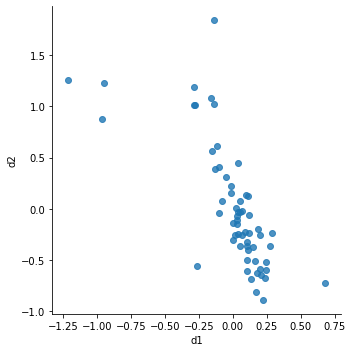

In [131]:
Xm_Opt_A = pd.DataFrame(mds_Opt_A.fit_transform(Xs_A),columns=['d1','d2'])

sns.lmplot(data=Xm_Opt_A,x='d1',y='d2',fit_reg=False)

### Número de clusters que se quieren

In [132]:
k = 8
cluster_Opt_A = KMeans(n_clusters = k)

In [133]:
cluster_Opt_A.fit(Xs_A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
df_modelar_A['cl_Optimizacion'] = Xs_A['cl_Optimizacion'] = Xm_Opt_A['cl']= cluster_Opt_A.predict(Xs_A)

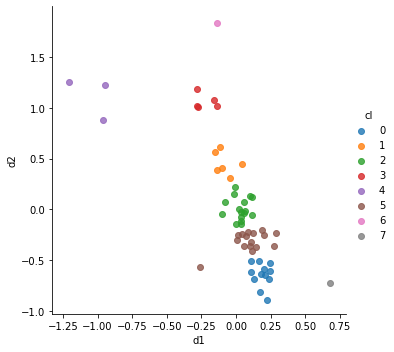

In [135]:
sns.lmplot(data=Xm_Opt_A,x='d1',y='d2',fit_reg=False,hue='cl')

In [136]:
Xs_A

,Minutos_prom_viaje_201704,Minutos_prom_viaje_201801,Minutos_prom_viaje_201802,Minutos_prom_viaje_201803,Minutos_prom_viaje_201804,Minutos_prom_viaje_201901,Minutos_prom_viaje_201902,Minutos_prom_viaje_201903,Minutos_prom_viaje_201904,cl_Optimizacion
0,0.512274,0.339781,0.234389,0.199436,0.213559,0.258244,0.220653,0.215142,0.562159,5
1,0.545930,0.359399,0.294073,0.271030,0.309153,0.354622,0.298252,0.320558,0.648313,2
2,0.673476,0.623731,0.553839,0.551359,0.510739,0.557378,0.515376,0.526824,0.739956,1
3,0.473019,0.261507,0.176023,0.167542,0.155597,0.158052,0.168379,0.184391,0.558530,5
4,0.475833,0.212318,0.135646,0.142879,0.117645,0.134966,0.124119,0.124476,0.519947,0
5,0.633877,0.563174,0.500769,0.470782,0.440178,0.528243,0.452161,0.442924,0.682560,1
6,0.415002,0.112244,0.023048,0.088443,0.125311,0.120169,0.163854,0.159957,0.547047,0
7,0.762472,0.837835,0.791191,0.744437,0.634877,0.669519,0.633212,0.632972,0.790613,3
8,0.780311,0.837859,0.828349,0.825042,0.732667,0.791015,0.698106,0.733040,0.842772,3
9,0.445294,0.168719,0.109599,0.081177,0.114497,0.153219,0.214802,0.214746,0.560212,0


ward


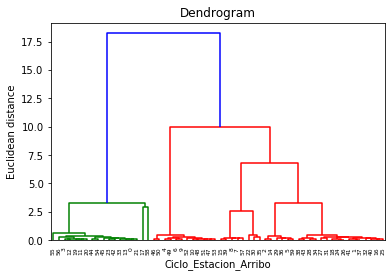

centroid


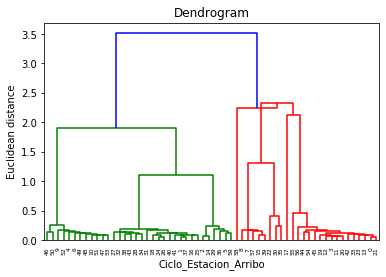

average


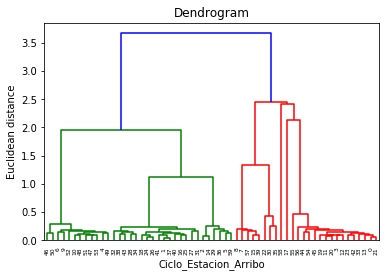

In [137]:
list_method_dendrogram = {'average','centroid','ward'}
for method_dendrogram_i in list_method_dendrogram:
    print(method_dendrogram_i)
    dendrogram = sch.dendrogram(sch.linkage(Xs_A, method = method_dendrogram_i))
    plt.title('Dendrogram')
    plt.xlabel(llave_A)
    plt.ylabel('Euclidean distance')
    plt.show()

### Muestra de Retiro

In [138]:
mds_Opt_R = MDS(n_components=2)

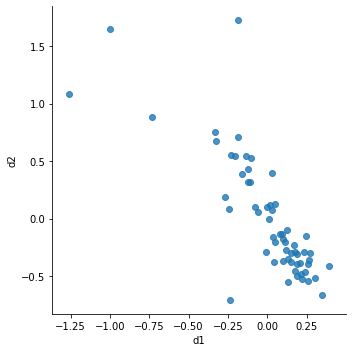

In [139]:
Xm_Opt_R = pd.DataFrame(mds_Opt_R.fit_transform(Xs_R),columns=['d1','d2'])

sns.lmplot(data=Xm_Opt_R,x='d1',y='d2',fit_reg=False)

In [140]:
cluster_Opt_R = KMeans(n_clusters = k)

In [141]:
cluster_Opt_R.fit(Xs_R)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
df_modelar_R['cl_Optimizacion'] = Xs_R['cl_Optimizacion'] = Xm_Opt_R['cl']= cluster_Opt_R.predict(Xs_R)

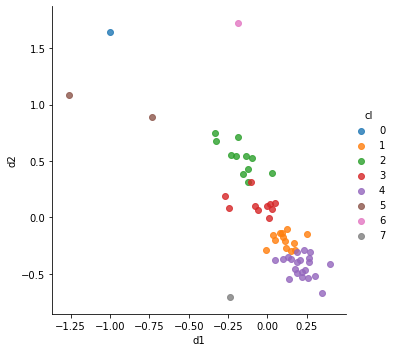

In [143]:
sns.lmplot(data=Xm_Opt_R,x='d1',y='d2',fit_reg=False,hue='cl')

ward


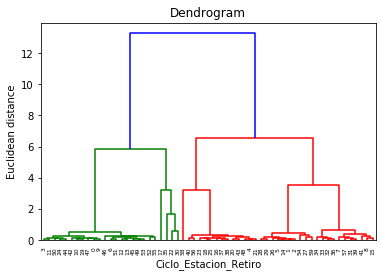

centroid


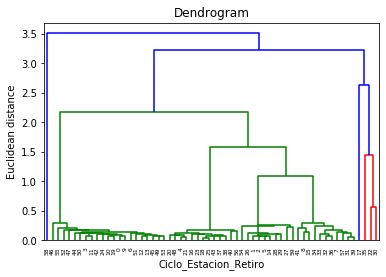

average


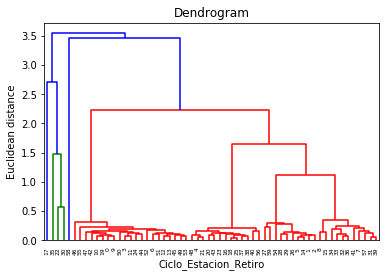

In [144]:
list_method_dendrogram = {'average','centroid','ward'}
for method_dendrogram_i in list_method_dendrogram:
    print(method_dendrogram_i)
    dendrogram = sch.dendrogram(sch.linkage(Xs_R, method = method_dendrogram_i))
    plt.title('Dendrogram')
    plt.xlabel(llave_R)
    plt.ylabel('Euclidean distance')
    plt.show()

# Clusterización por Jerarquización

## Average 

### Muestra de Retiro

In [145]:
llave_R = 'Ciclo_Estacion_Retiro'
ls_var_R = []
for var_i in df_modelar_R.columns:
    if var_i not in {llave_R,'Colonia','Alcaldia','cl_Optimizacion'}:
        ls_var_R.append(var_i)
ls_var_R

['Minutos_prom_viaje_201704',
 'Minutos_prom_viaje_201801',
 'Minutos_prom_viaje_201802',
 'Minutos_prom_viaje_201803',
 'Minutos_prom_viaje_201804',
 'Minutos_prom_viaje_201901',
 'Minutos_prom_viaje_201902',
 'Minutos_prom_viaje_201903',
 'Minutos_prom_viaje_201904']

In [146]:
Xs_jer_R = pd.DataFrame(df_training_Retiro.transform(df_modelar_R[ls_var_R]),columns=ls_var_R)
cluster = AgglomerativeClustering(linkage='average', n_clusters=7)

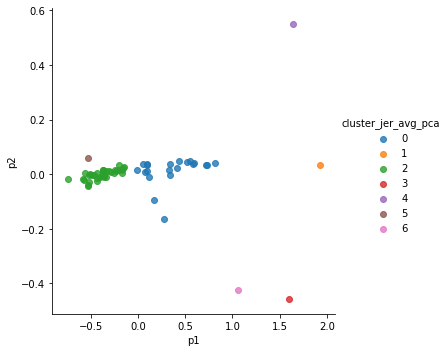

In [147]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_R)
Xp_jer_R = pd.DataFrame(pca.transform(Xs_jer_R),columns=['p1','p2'])
Xp_jer_R.reset_index()
Xp_jer_R['cluster_jer_avg_pca']= df_modelar_R['cluster_jer_avg_pca'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xp_jer_R,x='p1',y='p2',hue='cluster_jer_avg_pca',fit_reg=False)

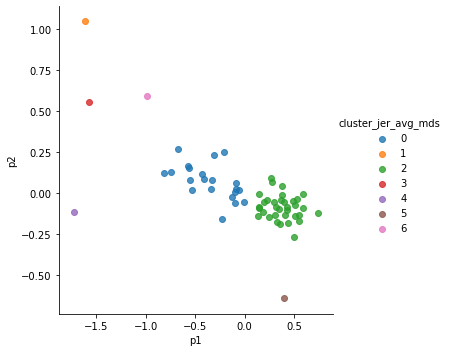

In [148]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_R = pd.DataFrame(mds.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xm_jer_R.reset_index()
Xm_jer_R['cluster_jer_avg_mds']= df_modelar_R['cluster_jer_avg_mds'] = cluster.fit_predict(Xs_jer_R)
Xm_jer_R.head(3)
sns.lmplot(data=Xm_jer_R,x='p1',y='p2',hue='cluster_jer_avg_mds',fit_reg=False)

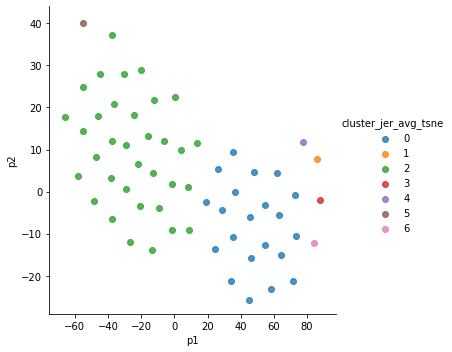

In [149]:
tsne = TSNE()
Xt_jer_R = pd.DataFrame(tsne.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xt_jer_R.reset_index()
Xt_jer_R['cluster_jer_avg_tsne']= df_modelar_R['cluster_jer_avg_tsne'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xt_jer_R,x='p1',y='p2',hue='cluster_jer_avg_tsne',fit_reg=False)

### Muestra de Arribo

In [150]:
llave_A = 'Ciclo_Estacion_Arribo'
ls_var_A = []
for var_i in df_modelar_A.columns:
    if var_i not in {llave_A,'Colonia','Alcaldia','cl_Optimizacion'}:
        ls_var_A.append(var_i)
ls_var_A

['Minutos_prom_viaje_201704',
 'Minutos_prom_viaje_201801',
 'Minutos_prom_viaje_201802',
 'Minutos_prom_viaje_201803',
 'Minutos_prom_viaje_201804',
 'Minutos_prom_viaje_201901',
 'Minutos_prom_viaje_201902',
 'Minutos_prom_viaje_201903',
 'Minutos_prom_viaje_201904']

In [151]:
Xs_jer_A = pd.DataFrame(df_training_Arribo.transform(df_modelar_A[ls_var_A]),columns=ls_var_A)
cluster = AgglomerativeClustering(linkage='average', n_clusters=7)

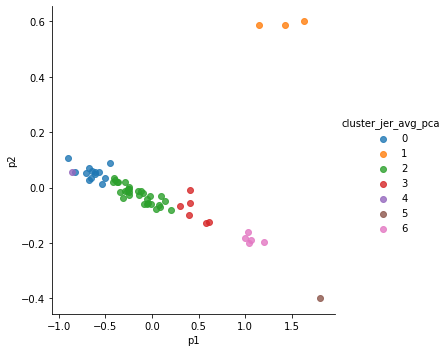

In [152]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_A)
Xp_jer_A = pd.DataFrame(pca.transform(Xs_jer_A),columns=['p1','p2'])
Xp_jer_A.reset_index()
Xp_jer_A['cluster_jer_avg_pca']= df_modelar_A['cluster_jer_avg_pca'] = cluster.fit_predict(Xs_jer_A)
sns.lmplot(data=Xp_jer_A,x='p1',y='p2',hue='cluster_jer_avg_pca',fit_reg=False)

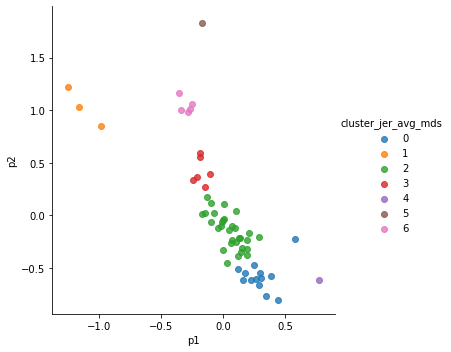

In [153]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_A = pd.DataFrame(mds.fit_transform(Xs_jer_A),columns=['p1','p2'])
Xm_jer_A.reset_index()
Xm_jer_A['cluster_jer_avg_mds']= df_modelar_A['cluster_jer_avg_mds'] = cluster.fit_predict(Xs_jer_A)
Xm_jer_A.head(3)
sns.lmplot(data=Xm_jer_A,x='p1',y='p2',hue='cluster_jer_avg_mds',fit_reg=False)

## Ward 

### Muestra de Retiro

In [154]:
cluster = AgglomerativeClustering(linkage='ward', n_clusters=7)

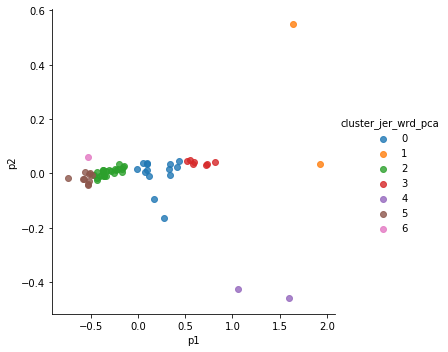

In [155]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_R)
Xp_jer_R = pd.DataFrame(pca.transform(Xs_jer_R),columns=['p1','p2'])
Xp_jer_R.reset_index()
Xp_jer_R['cluster_jer_wrd_pca']= df_modelar_R['cluster_jer_wrd_pca'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xp_jer_R,x='p1',y='p2',hue='cluster_jer_wrd_pca',fit_reg=False)

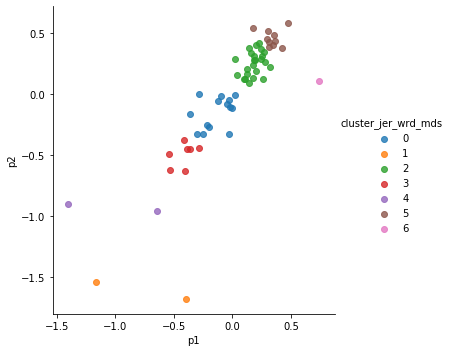

In [156]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_R = pd.DataFrame(mds.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xm_jer_R.reset_index()
Xm_jer_R['cluster_jer_wrd_mds']= df_modelar_R['cluster_jer_wrd_mds'] = cluster.fit_predict(Xs_jer_R)
Xm_jer_R.head(3)
sns.lmplot(data=Xm_jer_R,x='p1',y='p2',hue='cluster_jer_wrd_mds',fit_reg=False)

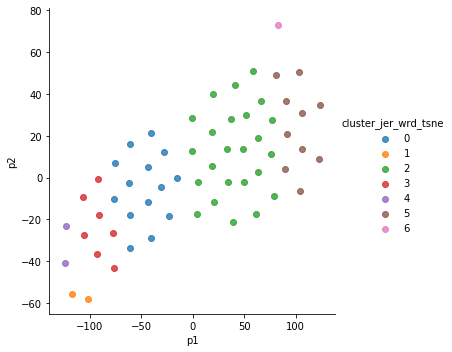

In [157]:
tsne = TSNE()
Xt_jer_R = pd.DataFrame(tsne.fit_transform(Xs_jer_R),columns=['p1','p2'])
Xt_jer_R.reset_index()
Xt_jer_R['cluster_jer_wrd_tsne']= df_modelar_R['cluster_jer_wrd_tsne'] = cluster.fit_predict(Xs_jer_R)
sns.lmplot(data=Xt_jer_R,x='p1',y='p2',hue='cluster_jer_wrd_tsne',fit_reg=False)

### Muestra de Arribo

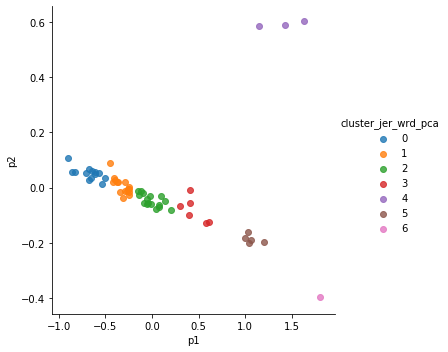

In [158]:
pca = PCA(n_components=2)
pca.fit(Xs_jer_A)
Xp_jer_A = pd.DataFrame(pca.transform(Xs_jer_A),columns=['p1','p2'])
Xp_jer_A.reset_index()
Xp_jer_A['cluster_jer_wrd_pca']= df_modelar_A['cluster_jer_wrd_pca'] = cluster.fit_predict(Xs_jer_A)
sns.lmplot(data=Xp_jer_A,x='p1',y='p2',hue='cluster_jer_wrd_pca',fit_reg=False)

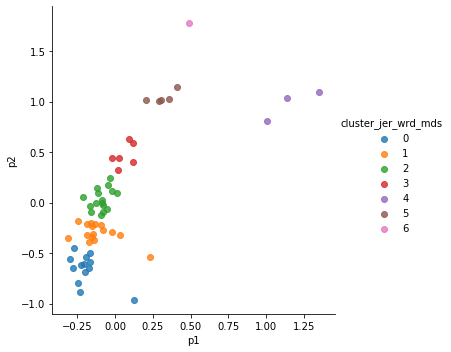

In [159]:
mds = MDS(n_components=2,n_jobs=-1)
Xm_jer_A = pd.DataFrame(mds.fit_transform(Xs_jer_A),columns=['p1','p2'])
Xm_jer_A.reset_index()
Xm_jer_A['cluster_jer_wrd_mds']= df_modelar_A['cluster_jer_wrd_mds'] = cluster.fit_predict(Xs_jer_A)
Xm_jer_A.head(3)
sns.lmplot(data=Xm_jer_A,x='p1',y='p2',hue='cluster_jer_wrd_mds',fit_reg=False)

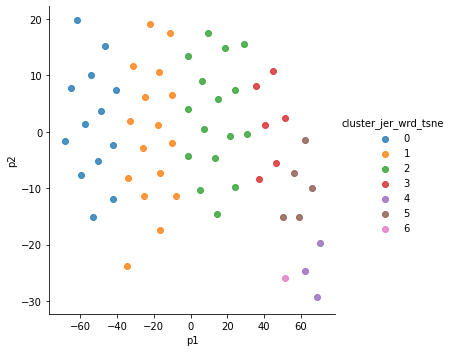

In [160]:
tsne = TSNE()
Xt_jer_A = pd.DataFrame(tsne.fit_transform(Xs_jer_A),columns=['p1','p2'])
Xt_jer_A.reset_index()
Xt_jer_A['cluster_jer_wrd_tsne']= df_modelar_A['cluster_jer_wrd_tsne'] = cluster.fit_predict(Xs_jer_A)
sns.lmplot(data=Xt_jer_A,x='p1',y='p2',hue='cluster_jer_wrd_tsne',fit_reg=False)

## Centroide 

### Muestra de Retiro

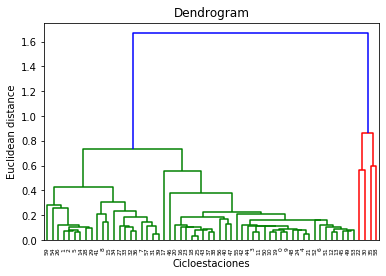

In [161]:
dendrogram = sch.dendrogram(sch.linkage(Xs_jer_R, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Cicloestaciones')
plt.ylabel('Euclidean distance')
plt.show()

### Muestra de Arribo

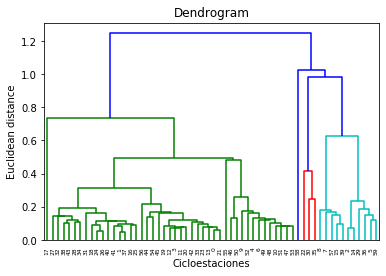

In [162]:
dendrogram = sch.dendrogram(sch.linkage(Xs_jer_A, method = 'centroid'))
plt.title('Dendrogram')
plt.xlabel('Cicloestaciones')
plt.ylabel('Euclidean distance')
plt.show()